In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
import scipy
from scipy import stats

In [10]:
root='.'
#root2='/Genomics/pritykinlab/zzhao/metabolic_analysis'
reaction_meta_file = f'{root}/data/compass_scrna/github_data/reaction_metadata.csv'
reaction_output_file = f'{root}/data/compass_scrna/github_data/reactions.tsv'
reaction_output_file_2 = f'{root}/compass_comparison/compass_results_data_reproduced.csv'
scrna_metadata_file = f'{root}/data/compass_scrna/geo_data/all_meta.csv'
out_dir = f'{root}/compass_comparison/scrna/'
#hypergeom_dir = f'{out_dir}scrna/'

In [14]:
reaction_metadata = pd.read_csv(reaction_meta_file, index_col = 0)
reaction_penalties = pd.read_csv(reaction_output_file, sep='\t', index_col=0)
reaction_metadata

,reaction_name,formula,associated_genes,subsystem,EC_number,confidence
reaction_no_direction,,,,,,
10FTHF5GLUtl,"5-glutamyl-10FTHF transport, lysosomal",1.00 * 10-formyltetrahydrofolate-[Glu](5) [c] ...,NaN,"Transport, lysosomal",NaN,2.0
10FTHF5GLUtm,"5-glutamyl-10FTHF transport, mitochondrial",1.00 * 10-formyltetrahydrofolate-[Glu](5) [m] ...,NaN,"Transport, mitochondrial",NaN,2.0
10FTHF6GLUtl,"6-glutamyl-10FTHF transport, lysosomal",1.00 * 10-formyltetrahydrofolate-[Glu](6) [c] ...,NaN,"Transport, lysosomal",NaN,2.0
10FTHF6GLUtm,"6-glutamyl-10FTHF transport, mitochondrial",1.00 * 10-formyltetrahydrofolate-[Glu](6) [m] ...,NaN,"Transport, mitochondrial",NaN,2.0
10FTHF7GLUtl,"7-glutamyl-10FTHF transport, lysosomal",1.00 * 10-formyltetrahydrofolate-[Glu](7) [c] ...,NaN,"Transport, lysosomal",NaN,2.0
...,...,...,...,...,...,...
MAL_Lte,Transport of L-malate,1.00 * (S)-malate(2-) [e] --> 1.00 * (S)-malat...,NaN,"Transport, extracellular",NaN,NaN
OROTGLUt,OROTGLUt,1.00 * L-glutamate(1-) [c] + 1.00 * Orotate [e...,SLC22A7,"Transport, extracellular",NaN,NaN
PNTOte,Transport of (R)-Pantothenate,1.00 * (R)-Pantothenate [e] --> 1.00 * (R)-Pan...,NaN,"Transport, extracellular",NaN,NaN


In [15]:
#This function is repeated here for clarity
def get_reaction_consistencies(compass_reaction_penalties, min_range=1e-3):
    """
        Converts the raw penalties outputs of compass into scores per reactions where higher numbers indicate more activity
    """
    df = -np.log(compass_reaction_penalties + 1)
    df = df[df.max(axis=1) - df.min(axis=1) >= min_range]
    df = df - df.min().min()
    return df

In [16]:
reaction_consistencies = get_reaction_consistencies(reaction_penalties)

In [17]:
from compass_analysis import cohens_d, wilcoxon_test, get_reaction_consistencies, get_metareactions, labeled_reactions, amino_acid_metab


In [18]:
reaction_consistencies

,SRR2921282,SRR2921283,SRR2921284,SRR2921285,SRR2921286,SRR2921287,SRR2921288,SRR2921289,SRR2921290,SRR2921291,...,SRR2921703,SRR2921704,SRR2921705,SRR2921706,SRR2921707,SRR2921708,SRR2921709,SRR2921710,SRR2921711,SRR2921712
10FTHF5GLUtl_pos,3.560098,3.579258,3.485923,3.584638,3.515186,3.558645,3.558489,3.543815,3.543955,3.516090,...,3.519169,3.529113,3.505519,3.547540,3.556900,3.541081,3.550715,3.587909,3.556162,3.506701
10FTHF5GLUtm_pos,3.234027,3.244194,3.279274,3.254046,3.203246,3.230456,3.323853,3.323872,3.311300,3.200736,...,3.296751,3.286697,3.249583,3.287074,3.264088,3.261074,3.216091,3.343650,3.325867,3.192499
10FTHF6GLUtl_pos,3.409903,3.436089,3.310607,3.444044,3.348049,3.408090,3.408453,3.395481,3.397799,3.349607,...,3.355255,3.372460,3.334797,3.392539,3.405190,3.383008,3.396777,3.457350,3.407172,3.337523
10FTHF6GLUtm_pos,3.207974,3.226635,3.221804,3.237842,3.171089,3.201245,3.285225,3.283461,3.263414,3.157963,...,3.242711,3.238099,3.203860,3.253589,3.235269,3.222103,3.183784,3.324754,3.283187,3.143835
10FTHF7GLUtl_pos,3.321002,3.350895,3.235614,3.360219,3.250377,3.318999,3.343339,3.332772,3.330132,3.252261,...,3.285036,3.306437,3.243860,3.316514,3.326009,3.311316,3.305916,3.401467,3.340940,3.238800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sink_decdicoa(c)_neg,1.985330,2.000964,1.941432,2.027745,1.910153,1.986186,1.996023,2.003792,1.948791,1.982319,...,2.063456,2.011850,1.990337,2.041585,2.062957,1.998108,2.030832,2.011791,1.969472,2.014824
sink_octdececoa(c)_neg,1.700189,1.700909,1.689598,1.741643,1.617176,1.672456,1.663766,1.745393,1.623148,1.670114,...,1.757744,1.667850,1.721753,1.714890,1.762804,1.724083,1.655184,1.684556,1.621820,1.754615
sink_pre_prot(r)_neg,7.563360,7.646562,7.633055,7.614586,7.544816,7.629731,7.588375,7.518963,7.542433,7.635217,...,7.618614,7.633269,7.537016,7.586845,7.598115,7.576199,7.690232,7.571615,7.576723,7.546652
sink_tetdec2coa(c)_neg,1.985330,2.000964,1.941432,2.027745,1.910153,1.986186,1.996023,2.003792,1.948791,1.982319,...,2.063456,2.011850,1.990337,2.041585,2.062957,1.998108,2.030832,2.011791,1.969472,2.014824


In [19]:
cell_metadata = pd.read_csv(scrna_metadata_file, sep=',', index_col=0)
cell_metadata.index = cell_metadata['cell_id']
cell_metadata

,cell_id,cell_type,NREADS,NALIGNED,geo
cell_id,,,,,
SRR2921289,SRR2921289,Th17p,1296320,922293,GSM1943112
SRR2921321,SRR2921321,Th17p,1320230,941281,GSM1943144
SRR2921373,SRR2921373,Th17p,2109040,1149880,GSM1943196
SRR2921293,SRR2921293,Th17p,1631870,1183900,GSM1943116
SRR2921400,SRR2921400,Th17p,1895830,1292000,GSM1943223
...,...,...,...,...,...
SRR2921699,SRR2921699,Th17n,2192860,1233820,GSM1943511
SRR2921671,SRR2921671,Th17n,2810280,1714280,GSM1943483
SRR2921633,SRR2921633,Th17n,1480070,996813,GSM1943445


In [20]:
Th17p_cells = cell_metadata.index[cell_metadata['cell_type'] == 'Th17p']
Th17n_cells = cell_metadata.index[cell_metadata['cell_type'] == 'Th17n']

In [40]:
# Th17p_Vehicle = scrna_metadata[scrna_metadata['cell_type'] == 'Th17p'].index
# print(Th17p_Vehicle)
# Th17n_Vehicle = scrna_metadata[scrna_metadata['cell_type'] == 'Th17n'].index
# print(Th17n_Vehicle)

In [21]:
wilcox_results = wilcoxon_test(reaction_consistencies, Th17p_cells, Th17n_cells)
wilcox_results['metadata_r_id'] = ""
for r in wilcox_results.index:
    if r in reaction_metadata.index:
        wilcox_results.loc[r, 'metadata_r_id'] = r
    elif r[:-4] in reaction_metadata.index:
        wilcox_results.loc[r, 'metadata_r_id'] = r[:-4]
    else:
        print("Should not occur")

In [22]:
W = wilcox_results.merge(reaction_metadata, how='left', 
                         left_on='metadata_r_id', right_index=True, validate='m:1')
W = W[W['confidence'].isin([0,4])]
W = W[~W['EC_number'].isna()]
W.loc[(W['formula'].map(lambda x: '[m]' not in x)) & (W['subsystem'] == "Citric acid cycle"), 'subsystem'] = 'Other'

In [23]:
wilcox_results.loc[['r0281_pos']]

,wilcox_stat,wilcox_pval,cohens_d,adjusted_pval,metadata_r_id
r0281_pos,9269.0,0.085969,-0.221507,0.153082,r0281


In [24]:
reaction_metadata.loc['r0281']['formula']

'1.00 * Water [e] + 1.00 * O2 [e] + 1.00 * Putrescine [e] --> 1.00 * Ammonium [e] + 1.00 * Hydrogen peroxide [e] + 1.00 * 4-Aminobutanal [e]\nAOC1'

In [25]:
W[W['adjusted_pval']<0.05].sort_values(by=['adjusted_pval'])

,wilcox_stat,wilcox_pval,cohens_d,adjusted_pval,metadata_r_id,reaction_name,formula,associated_genes,subsystem,EC_number,confidence
NADPNe_pos,69.0,3.297642e-52,-2.184415,3.002268e-49,NADPNe,"NADP nucleosidase,extracellular",1.00 * Water [e] + 1.00 * Nicotinamide adenine...,CD38,NAD metabolism,3.2.2.6,4.0
NADNe_pos,69.0,3.297642e-52,-2.184415,3.002268e-49,NADNe,"NAD nucleosidase,extracellular",1.00 * Water [e] + 1.00 * Nicotinamide adenine...,CD38,NAD metabolism,3.2.2.5,4.0
r0281_neg,701.0,3.496712e-49,-1.191069,1.591753e-46,r0281,Putrescine:oxygen oxidoreductase (deaminating)...,1.00 * Water [e] + 1.00 * O2 [e] + 1.00 * Putr...,AOC1,Methionine and cysteine metabolism,1.4.3.6,0.0
FACOAL1821_neg,3491.0,9.612729e-23,-1.211433,3.603642e-20,FACOAL1821,fatty-acid--CoA ligase,1.00 * ATP [c] + 1.00 * Coenzyme A [c] + 1.00 ...,ACSBG2; ACSL1; ACSL3; ACSL4,Fatty acid oxidation,6.2.1.3,4.0
r1257_pos,3871.0,1.642885e-20,-1.175001,4.362544e-18,r1257,EC:6.2.1.3,1.00 * ATP [r] + 1.00 * Coenzyme A [r] + 1.00 ...,ACSBG2; ACSL1; ACSL3; ACSL4; ACSL5; ACSL6; SLC...,Fatty acid oxidation,6.2.1.3,0.0
...,...,...,...,...,...,...,...,...,...,...,...
RE1835C_pos,12169.0,1.895530e-02,0.248335,4.664174e-02,RE1835C,RE1835,1.00 * Water [c] + 1.00 * chenodeoxycholoyl co...,ACOT2; ACOT6; BAAT,Bile acid synthesis,3.1.2.2,0.0
r0283_pos,12169.0,1.895530e-02,0.248335,4.664174e-02,r0283,L-Histidine:beta-alanine ligase (AMP-forming) ...,1.00 * ATP [c] + 1.00 * beta-alanine [c] + 1.0...,CARNS1,beta-Alanine metabolism,6.3.2.11,0.0
P45027A15m_pos,12164.0,1.931471e-02,0.213556,4.737978e-02,P45027A15m,"5-beta-cytochrome P450, family 27, subfamily A...",1.00 * proton [m] + 1.00 * Nicotinamide adenin...,CYP27A1,Bile acid synthesis,1.14.13.15,4.0
PGI_neg,12161.0,1.953321e-02,0.304888,4.789732e-02,PGI,glucose-6-phosphate isomerase,1.00 * D-Glucose 6-phosphate [c] --> 1.00 * D-...,GPI1,Glycolysis/gluconeogenesis,5.3.1.9,0.0


In [26]:
W[W['adjusted_pval']<0.05]['subsystem'].value_counts()

Nucleotide interconversion        58
Unassigned                        57
Fatty acid oxidation              41
Sphingolipid metabolism           36
Blood group synthesis             25
                                  ..
beta-Alanine metabolism            1
Tetrahydrobiopterin metabolism     1
Butanoate metabolism               1
CoA catabolism                     1
Ubiquinone synthesis               1
Name: subsystem, Length: 69, dtype: int64

In [ ]:
compass_res_github = W

In [34]:
# use results from zhengqiao
W = pd.read_csv(reaction_output_file_2, sep=',', index_col = 0)

In [33]:
gene_set_all = []
for gene_list in W[W['adjusted_pval']<0.05]['associated_genes'].values:
    if type(gene_list) is not float:
        gene_set_all.extend(gene_list.split('; '))
print(len(gene_set_all))

1001


In [35]:
from collections import Counter
Counter(gene_set_all).most_common()

[('ACSL1', 24),
 ('GM20390', 15),
 ('NME2', 15),
 ('PNP2', 14),
 ('FUT9', 11),
 ('FPGS', 9),
 ('PYCR1', 8),
 ('PYCR2', 8),
 ('RRM1', 8),
 ('RRM2', 8),
 ('RRM2B', 8),
 ('ACSL3', 7),
 ('SLC27A2', 7),
 ('HSD17B4', 7),
 ('FUT1', 7),
 ('XDH', 7),
 ('ALDH3A1', 6),
 ('ALDH3B1', 6),
 ('ALDH1B1', 6),
 ('ALDH3A2', 6),
 ('AKR1A1', 6),
 ('AKR1B3', 6),
 ('AKR7A5', 6),
 ('ACSBG2', 6),
 ('ACSL4', 6),
 ('ACAA1B', 6),
 ('EHHADH', 6),
 ('ST8SIA5', 6),
 ('ALDH3B3', 5),
 ('ALDH9A1', 5),
 ('CRAT', 5),
 ('ACSL5', 5),
 ('ACSL6', 5),
 ('ACOX1', 5),
 ('BCAT2', 5),
 ('NT5C', 5),
 ('NT5C3', 5),
 ('ALDH4A1', 5),
 ('FDFT1', 5),
 ('LDHA', 4),
 ('LDHAL6B', 4),
 ('LDHB', 4),
 ('LDHC', 4),
 ('UEVLD', 4),
 ('ACADM', 4),
 ('AK5', 4),
 ('ATIC', 4),
 ('ALDH7A1', 4),
 ('ALDH2', 4),
 ('B3GALT4', 4),
 ('DCK', 4),
 ('BPGM', 4),
 ('PGAM1', 4),
 ('PGAM2', 4),
 ('MTHFD1', 4),
 ('CTSA', 4),
 ('GALNS', 4),
 ('GLB1', 4),
 ('NEU1', 4),
 ('B4GALNT1', 4),
 ('MTHFR', 4),
 ('NME3', 4),
 ('NME6', 4),
 ('NME7', 4),
 ('DBT', 4),
 ('DLD', 4

In [36]:
W['subsystem'].value_counts()

Fatty acid oxidation                                 251
Nucleotide interconversion                           168
N-glycan synthesis                                    61
Keratan sulfate degradation                           60
Bile acid synthesis                                   55
Valine, leucine, and isoleucine metabolism            45
Steroid metabolism                                    43
Keratan sulfate synthesis                             41
Sphingolipid metabolism                               41
Glycolysis/gluconeogenesis                            40
Folate metabolism                                     39
Glycerophospholipid metabolism                        38
Cholesterol metabolism                                37
Tyrosine metabolism                                   37
Pentose phosphate pathway                             36
Urea cycle                                            32
Pyrimidine catabolism                                 32
Fatty acid synthesis           

# replicate figures

Text(0.5, 0, "Cohen's d")

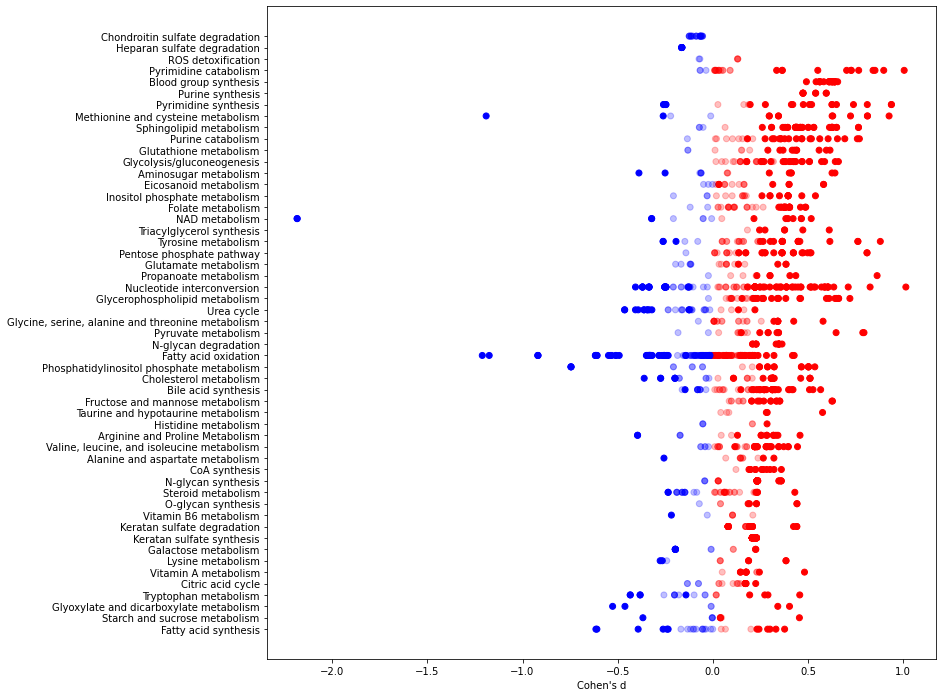

In [37]:
data = W[~W['subsystem'].isin(["Miscellaneous", "Unassigned"])]
data = data[~data['subsystem'].map(lambda x: "Transport" in x or "Exchange" in x or x == "Other")]
items, counts = np.unique(data['subsystem'], return_counts=True)
items = [items[i] for i in range(len(items)) if counts[i] > 5] #filter(n() > 5) %>%
data = data[data['subsystem'].isin(items)]
plt.figure(figsize=(12,12))
axs = plt.gca()
#Sorts the reactions for plotting
d = data[data['adjusted_pval'] < 0.1].groupby('subsystem')['cohens_d'].median().abs()
axs.scatter(d[d.argsort], d[d.argsort].index, alpha=0)
color = data['cohens_d'].map(lambda x: 'r' if x >= 0 else 'b')
alpha = data['adjusted_pval'].map(lambda x: 1.0 if x < 0.1 else 0.25)
axs.scatter(data['cohens_d'], data['subsystem'], c=color, alpha=alpha)
axs.set_xlabel("Cohen's d")

Text(0.5, 0, "Cohen's d")

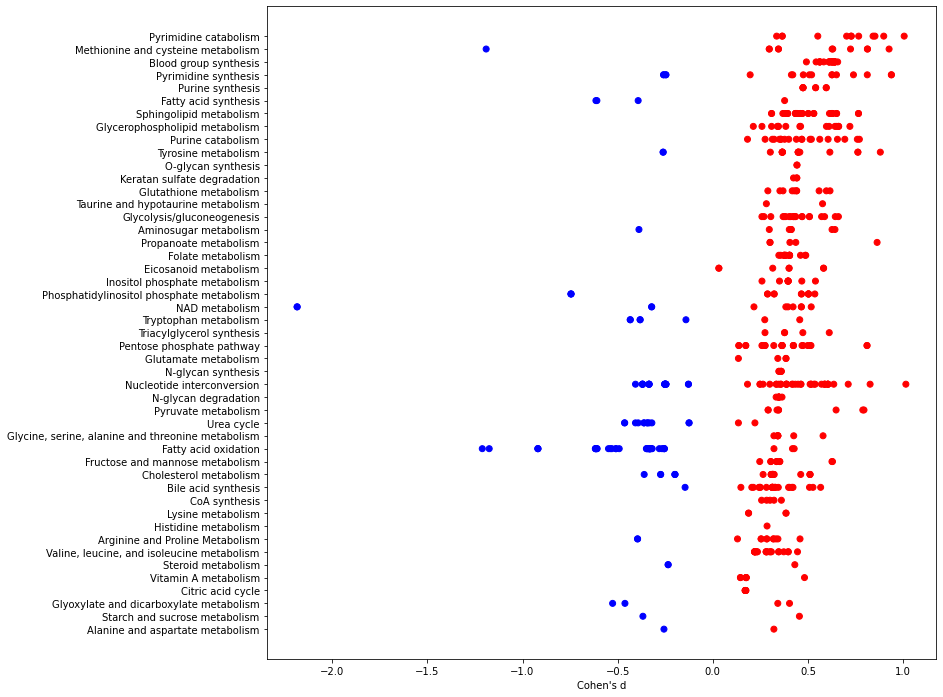

In [38]:
# only signficant
data = W[~W['subsystem'].isin(["Miscellaneous", "Unassigned"])]
data = data[~data['subsystem'].map(lambda x: "Transport" in x or "Exchange" in x or x == "Other")]
items, counts = np.unique(data['subsystem'], return_counts=True)
items = [items[i] for i in range(len(items)) if counts[i] > 5] #filter(n() > 5) %>%
data = data[data['subsystem'].isin(items)]

data = data[data['adjusted_pval'] < 0.05]

plt.figure(figsize=(12,12))
axs = plt.gca()
#Sorts the reactions for plotting
d = data[data['adjusted_pval'] < 0.1].groupby('subsystem')['cohens_d'].median().abs()
axs.scatter(d[d.argsort], d[d.argsort].index, alpha=0)
color = data['cohens_d'].map(lambda x: 'r' if x >= 0 else 'b')
alpha = data['adjusted_pval'].map(lambda x: 1.0 if x < 0.1 else 0.25)
axs.scatter(data['cohens_d'], data['subsystem'], c=color, alpha=alpha)
axs.set_xlabel("Cohen's d")

In [39]:
print(data[data['adjusted_pval'] < 0.05].groupby('subsystem')['cohens_d'].quantile([.25]))

subsystem                                              
Alanine and aspartate metabolism                   0.25   -0.112165
Aminosugar metabolism                              0.25    0.349482
Arginine and Proline Metabolism                    0.25    0.222962
Bile acid synthesis                                0.25    0.249703
Blood group synthesis                              0.25    0.582890
Cholesterol metabolism                             0.25    0.264365
Citric acid cycle                                  0.25    0.170517
CoA synthesis                                      0.25    0.282877
Eicosanoid metabolism                              0.25    0.173526
Fatty acid oxidation                               0.25   -0.607775
Fatty acid synthesis                               0.25   -0.610363
Folate metabolism                                  0.25    0.374978
Fructose and mannose metabolism                    0.25    0.304740
Glutamate metabolism                               0.25    0

# compare results to hypergeom test

In [40]:
#data.to_csv(out_dir + 'compass_results_data_deseq.csv')

In [41]:
# data = pd.read_csv(out_dir + 'compass_results_data_deseq.csv', index_col = 0)
W

,wilcox_stat,wilcox_pval,cohens_d,adjusted_pval,metadata_r_id,reaction_name,formula,associated_genes,subsystem,EC_number,confidence
2HBO_neg,10600.0,8.829930e-01,0.093878,9.156059e-01,2HBO,2-Hydroxybutyrate:NAD+ oxidoreductase,1.00 * 2-Hydroxybutyrate [c] + 1.00 * Nicotina...,LDHA; LDHAL6B; LDHB; LDHC; UEVLD,Propanoate metabolism,1.1.1.27,4.0
2HBO_pos,12183.0,1.797987e-02,0.405221,4.497084e-02,2HBO,2-Hydroxybutyrate:NAD+ oxidoreductase,1.00 * 2-Hydroxybutyrate [c] + 1.00 * Nicotina...,LDHA; LDHAL6B; LDHB; LDHC; UEVLD,Propanoate metabolism,1.1.1.27,4.0
34DHOXPEGOX_pos,14828.0,1.251748e-09,0.762535,5.081141e-08,34DHOXPEGOX,"3,4-Dihydroxyphenylethyleneglycol:NAD+ oxidore...",1.00 * proton [c] + 1.00 * Nicotinamide adenin...,ADH1; ADH4; ADH5; ADH6A; ADH7; ADHFE1,Tyrosine metabolism,1.1.1.1,4.0
34DHPLACOX_NADP__neg,12799.0,1.240216e-03,0.365011,4.936849e-03,34DHPLACOX_NADP_,"3,4-Dihydroxyphenylacetaldehyde:NADP+ oxidored...",1.00 * Water [c] + 1.00 * Nicotinamide adenine...,ALDH3A1; ALDH3B1; ALDH3B3,Tyrosine metabolism,1.2.1.5,4.0
34DHPLACOX_pos,12799.0,1.240216e-03,0.365011,4.936849e-03,34DHPLACOX,"3,4-Dihydroxyphenylacetaldehyde:NAD+ oxidoredu...",1.00 * Water [c] + 1.00 * Nicotinamide adenine...,ALDH1A3; ALDH3A1; ALDH3B1; ALDH3B3,Tyrosine metabolism,1.2.1.5,4.0
...,...,...,...,...,...,...,...,...,...,...,...
r1449_pos,10242.0,7.239214e-01,-0.014869,7.835514e-01,r1449,EC:1.3.3.6,1.00 * ubiquinone-10 [m] + 1.00 * Tetradecanoy...,ACOX1; ACOX3,Fatty acid oxidation,1.3.3.6,0.0
r1450_pos,10242.0,7.239214e-01,-0.014821,7.835514e-01,r1450,EC:1.3.3.6,1.00 * ubiquinone-10 [m] + 1.00 * Hexanoyl-CoA...,ACOX1; ACOX3,Fatty acid oxidation,1.3.3.6,0.0
r1451_pos,10242.0,7.239214e-01,-0.014869,7.835514e-01,r1451,EC:1.3.3.6,1.00 * ubiquinone-10 [m] + 1.00 * Decanoyl-CoA...,ACOX1; ACOX3,Fatty acid oxidation,1.3.3.6,0.0
r1487_pos,12073.0,2.697718e-02,0.281979,6.144587e-02,r1487,EC:6.2.1.3,1.00 * ATP [r] + 1.00 * Coenzyme A [r] + 1.00 ...,ACSBG2; ACSL1; ACSL3; ACSL4; ACSL5; ACSL6; SLC...,Fatty acid oxidation,6.2.1.3,0.0


In [42]:
sig_data = data[data['adjusted_pval'] < 0.05]
sig_data

,wilcox_stat,wilcox_pval,cohens_d,adjusted_pval,metadata_r_id,reaction_name,formula,associated_genes,subsystem,EC_number,confidence
2HBO_pos,12183.0,1.797987e-02,0.405221,4.497084e-02,2HBO,2-Hydroxybutyrate:NAD+ oxidoreductase,1.00 * 2-Hydroxybutyrate [c] + 1.00 * Nicotina...,LDHA; LDHAL6B; LDHB; LDHC; UEVLD,Propanoate metabolism,1.1.1.27,4.0
34DHOXPEGOX_pos,14828.0,1.251748e-09,0.762535,5.081141e-08,34DHOXPEGOX,"3,4-Dihydroxyphenylethyleneglycol:NAD+ oxidore...",1.00 * proton [c] + 1.00 * Nicotinamide adenin...,ADH1; ADH4; ADH5; ADH6A; ADH7; ADHFE1,Tyrosine metabolism,1.1.1.1,4.0
34DHPLACOX_NADP__neg,12799.0,1.240216e-03,0.365011,4.936849e-03,34DHPLACOX_NADP_,"3,4-Dihydroxyphenylacetaldehyde:NADP+ oxidored...",1.00 * Water [c] + 1.00 * Nicotinamide adenine...,ALDH3A1; ALDH3B1; ALDH3B3,Tyrosine metabolism,1.2.1.5,4.0
34DHPLACOX_pos,12799.0,1.240216e-03,0.365011,4.936849e-03,34DHPLACOX,"3,4-Dihydroxyphenylacetaldehyde:NAD+ oxidoredu...",1.00 * Water [c] + 1.00 * Nicotinamide adenine...,ALDH1A3; ALDH3A1; ALDH3B1; ALDH3B3,Tyrosine metabolism,1.2.1.5,4.0
34DHXMANDACOX_NADP__neg,12799.0,1.240216e-03,0.365011,4.936849e-03,34DHXMANDACOX_NADP_,"3,4-Dihydroxymandelaldehyde:NADP+ oxidoreductase",1.00 * Water [c] + 1.00 * Nicotinamide adenine...,ALDH3B1; ALDH3B3,Tyrosine metabolism,1.2.1.5,4.0
...,...,...,...,...,...,...,...,...,...,...,...
r1380_pos,12626.0,2.817520e-03,0.322824,9.607307e-03,r1380,delta24-sterol reductase Biosynthesis of stero...,1.00 * proton [r] + 1.00 * Nicotinamide adenin...,DHCR24,Cholesterol metabolism,1.3.1.72,0.0
r1381_neg,12576.0,3.535383e-03,0.315486,1.153661e-02,r1381,5alpha-Cholest-7-en-3beta-ol delta7-delta8-iso...,1.00 * 5alpha-cholest-7-en-3beta-ol [r] --> 1....,EBP,Cholesterol metabolism,5.3.3.5,0.0
r1384_neg,14180.5,2.344806e-07,0.357815,3.624143e-06,r1384,Guanosine aminohydrolase EC:3.5.4.15,1.00 * Water [c] + 1.00 * proton [c] + 1.00 * ...,NaN,Nucleotide interconversion,3.5.4.15,0.0
r1384_pos,13305.0,8.191911e-05,0.416011,5.083452e-04,r1384,Guanosine aminohydrolase EC:3.5.4.15,1.00 * Water [c] + 1.00 * proton [c] + 1.00 * ...,NaN,Nucleotide interconversion,3.5.4.15,0.0


## subsystem level

In [113]:
pvn_sub_all = pd.read_csv(out_dir + 'results_Th17p_v_n_compass_rxns_mw.csv', index_col = 0)
nvp_sub_all = pd.read_csv(out_dir + 'results_Th17n_v_p_compass_rxns_mw.csv', index_col = 0)
pvn_sub = pvn_sub_all[pvn_sub_all['p'] < 1]
nvp_sub = nvp_sub_all[nvp_sub_all['p'] < 1]
#subsystem_terms = pd.read_csv(out_dir + 'subsystem_term_names_geo.csv')['0']

In [73]:
sig_data[sig_data['cohens_d'] > 0]['subsystem'].value_counts()

Nucleotide interconversion                           37
Sphingolipid metabolism                              36
Blood group synthesis                                25
Bile acid synthesis                                  24
Pentose phosphate pathway                            24
Valine, leucine, and isoleucine metabolism           22
Purine catabolism                                    20
Glycolysis/gluconeogenesis                           20
Cholesterol metabolism                               19
Folate metabolism                                    17
Glycerophospholipid metabolism                       16
Tyrosine metabolism                                  15
Pyrimidine synthesis                                 13
Pyrimidine catabolism                                12
Phosphatidylinositol phosphate metabolism            11
Arginine and Proline Metabolism                      10
Methionine and cysteine metabolism                   10
Glutathione metabolism                          

In [75]:
pvn_sub_all[pvn_sub_all['p'] < 1].sort_values('p')

,term,p,padj,q
21,Purine synthesis,0.102497,1.0,1.0
6,Fatty acid synthesis,0.149751,1.0,1.0
1,Keratan sulfate synthesis,0.257324,1.0,1.0
12,Selenoamino acid metabolism,0.296456,1.0,1.0
9,Methionine and cysteine metabolism,0.351336,1.0,1.0
10,Lysine metabolism,0.401952,1.0,1.0
7,Aminosugar metabolism,0.448632,1.0,1.0
4,"Valine, leucine, and isoleucine metabolism",0.531385,1.0,1.0
2,Inositol phosphate metabolism,0.704569,1.0,1.0
23,Oxidative phosphorylation,0.768671,1.0,1.0


In [77]:
nvp_sub_all[nvp_sub_all['p'] < 1].sort_values('p')

,term,p,padj,q
38,N-glycan synthesis,0.124379,1.0,1.0
20,Heme synthesis,0.180659,1.0,1.0
1,Keratan sulfate synthesis,0.306082,1.0,1.0
36,"Transport, lysosomal",0.431582,1.0,1.0
10,Lysine metabolism,0.468168,1.0,1.0
7,Aminosugar metabolism,0.518692,1.0,1.0


In [78]:
# 1: get proportion of shared items that are significant
def get_overlap(compass, hypergeom, col1 = 'term', col2 = 'subsystem'):
    intersection = len(set(hypergeom[col1]) & set(compass[col2]))
    return intersection/len(set(compass[col2])), intersection/len(set(hypergeom[col1]))

In [151]:
# 2: get correlation between cohen's d & q value for all
def get_correlation(compass, hypergeom, how = 'p', col1 = 'term', col2 = 'subsystem'):
    compass_df = compass.groupby(col2).mean()
    hypergeom_df = hypergeom.copy()
    hypergeom_df.index = hypergeom_df[col1]
    shared_subsystems = [i for i in compass_df.index if i in hypergeom_df.index]
    hypergeom_df = hypergeom_df.loc[shared_subsystems]
    compass_df = compass_df.loc[shared_subsystems]
    if len(shared_subsystems) > 1:
        if how == 'p':
            res = stats.spearmanr(hypergeom_df['p'], abs(compass_df['adjusted_pval']))[0]
        elif how == 'd':
            res = stats.spearmanr(hypergeom_df['p'], abs(compass_df['cohens_d']))[0]
        else:
            raise(f'how should be p or d')
        return res
    else:
        return np.nan

In [59]:
# # 3: hypergeometric for overlap between significant results
# def get_hypergeom_overlap(compass, hypergeom, all_terms = subsystem_terms, col1 = 'term', col2 = 'subsystem'):
#     compass_d = set(compass[compass['adjusted_pval']< 0.05][col2])
#     compass_d = compass_d & set(all_terms)
#     M = len(all_terms)
#     n = len(hypergeom) # number of met genes
#     N = len(compass_d)
#     x = len(compass_d & set(hypergeom[col1]))
#     pct_overlap = x/(N+n)
#     hypergeom_model = stats.hypergeom(M=M, n=n, N=N)
#     p_val = hypergeom_model.sf(x-1)
#     return p_val

## spearman res

In [406]:
data = W[~W['subsystem'].isin(["Miscellaneous", "Unassigned"])]
data = data[~data['subsystem'].map(lambda x: "Transport" in x or "Exchange" in x or x == "Other")]
items, counts = np.unique(data['subsystem'], return_counts=True)
items = [items[i] for i in range(len(items)) if counts[i] > 5] #filter(n() > 5) %>%
data = data[data['subsystem'].isin(items)]

**for all**

pathogenic enriched genes -- all terms
PvN p: corr: 0.273453695817986 p: 0.2303655225445998
PvN d: corr: -0.13821300929930813 p: 0.5501954399436697

non pathogenic enriched genes -- all terms
NvP p: corr: -0.11607584907074292 p: 0.6573003010784375
NvP d: corr: 0.029479580716379156 p: 0.9105754545750198


**for significant**

In [412]:
print(f"pathogenic enriched genes -- all terms")
print(f"PvN p: corr: {get_correlation(data[data['cohens_d'] > 0], pvn_sub_all, how = 'p')} p: {get_correlation_p(data[data['cohens_d'] > 0], pvn_sub_all, how = 'p')}")
print(f"PvN d: corr: {get_correlation(data[data['cohens_d'] > 0], pvn_sub_all, how = 'd')} p: {get_correlation_p(data[data['cohens_d'] > 0], pvn_sub_all, how = 'd')}")
print(f"\nnon pathogenic enriched genes -- all terms")
print(f"NvP p: corr: {get_correlation(data[data['cohens_d'] < 0], nvp_sub_all, how = 'p')} p: {get_correlation_p(data[data['cohens_d'] < 0], nvp_sub_all, how = 'p')}")
print(f"NvP d: corr: {get_correlation(data[data['cohens_d'] < 0], nvp_sub_all, how = 'd')} p: {get_correlation_p(data[data['cohens_d'] < 0], nvp_sub_all, how = 'd')}")

pathogenic enriched genes -- all terms
PvN p: corr: 0.273453695817986 p: 0.2303655225445998
PvN d: corr: -0.13821300929930813 p: 0.5501954399436697

non pathogenic enriched genes -- all terms
NvP p: corr: -0.11607584907074292 p: 0.6573003010784375
NvP d: corr: 0.029479580716379156 p: 0.9105754545750198


In [417]:
print(f"pathogenic enriched genes -- all compass & hypergeom p < 1")
print(f"PvN p: corr: {get_correlation(data[data['cohens_d'] > 0], pvn_sub, how = 'p')} p: {get_correlation_p(data[data['cohens_d'] > 0], pvn_sub, how = 'p')}")
print(f"PvN d: corr: {get_correlation(data[data['cohens_d'] > 0], pvn_sub, how = 'd')} p: {get_correlation_p(data[data['cohens_d'] > 0], pvn_sub, how = 'd')}")
print(f"\nnon pathogenic enriched genes -- all compass & hypergeom p < 1")
print(f"NvP p: corr: {get_correlation(data[data['cohens_d'] < 0], nvp_sub, how = 'p')} p: {get_correlation_p(data[data['cohens_d'] < 0], nvp_sub, how = 'p')}")
print(f"NvP d: corr: {get_correlation(data[data['cohens_d'] < 0], nvp_sub, how = 'd')} p: {get_correlation_p(data[data['cohens_d'] < 0], nvp_sub, how = 'd')}")

pathogenic enriched genes -- all compass & hypergeom p < 1
PvN p: corr: 0.3333333333333334 p: 0.4197530864197531
PvN d: corr: -0.261904761904762 p: 0.530922861565801

non pathogenic enriched genes -- all compass & hypergeom p < 1
NvP p: corr: -0.5 p: 0.6666666666666667
NvP d: corr: 0.5 p: 0.6666666666666667


In [415]:
sig_data = data[data['adjusted_pval'] < 0.05]

In [418]:
print(f"pathogenic enriched genes -- only significant terms (for compass) and terms with p < 1 (for hypergeometric)")
print(f"PvN p: corr: {get_correlation(sig_pvn, pvn_sub, how = 'p')} p: {get_correlation_p(sig_pvn, pvn_sub, how = 'p')}")
print(f"PvN d: corr: {get_correlation(sig_pvn, pvn_sub, how = 'd')} p: {get_correlation_p(sig_pvn, pvn_sub, how = 'd')}")
print(f"\nnon pathogenic enriched genes -- only significant")
print(f"NvP p: corr: {get_correlation(sig_nvp, nvp_sub, how = 'p')} p: {get_correlation_p(sig_nvp, nvp_sub, how = 'p')}")
print(f"NvP d: corr: {get_correlation(sig_nvp, nvp_sub, how = 'd')} p: {get_correlation_p(sig_nvp, nvp_sub, how = 'd')}")

pathogenic enriched genes -- only significant terms (for compass) and terms with p < 1 (for hypergeometric)
PvN p: corr: 0.5357142857142858 p: 0.21521745567801273
PvN d: corr: -0.3571428571428572 p: 0.4316113520383278

non pathogenic enriched genes -- only significant
NvP p: corr: nan p: nan
NvP d: corr: nan p: nan


In [420]:
nvp_sub

,term,p,padj,q
1,Keratan sulfate synthesis,0.306082,1.0,1.0
7,Aminosugar metabolism,0.518692,1.0,1.0
10,Lysine metabolism,0.468168,1.0,1.0
20,Heme synthesis,0.180659,1.0,1.0
36,"Transport, lysosomal",0.431582,1.0,1.0
38,N-glycan synthesis,0.124379,1.0,1.0


In [419]:
sig_nvp

,wilcox_stat,wilcox_pval,cohens_d,adjusted_pval,metadata_r_id,reaction_name,formula,associated_genes,subsystem,EC_number,confidence
AGMTm_pos,7892.0,2.651485e-04,-0.395333,1.352915e-03,AGMTm,agmatinase (m),1.00 * Water [m] + 1.00 * agmatinium(2+) [m] -...,AGMAT,Arginine and Proline Metabolism,3.5.3.11,4.0
ARGDCm_pos,7892.0,2.651485e-04,-0.395333,1.352915e-03,ARGDCm,arginine decarboxylase (m),1.00 * proton [m] + 1.00 * L-argininium(1+) [m...,AZIN2,Arginine and Proline Metabolism,4.1.1.19,4.0
ARGN_pos,7841.0,2.002890e-04,-0.406425,1.072640e-03,ARGN,arginase,1.00 * Water [c] + 1.00 * L-argininium(1+) [c]...,ARG1; ARG2,Urea cycle,3.5.3.1,4.0
ARGNm_pos,8434.0,3.883701e-03,-0.320090,1.251939e-02,ARGNm,arginase (m),1.00 * Water [m] + 1.00 * L-argininium(1+) [m]...,ARG2,Urea cycle,3.5.3.1,4.0
ARGSL_pos,8669.0,1.052572e-02,-0.256597,2.886421e-02,ARGSL,argininosuccinate lyase,1.00 * N(omega)-(L-Arginino)succinate [c] --> ...,NaN,Alanine and aspartate metabolism,4.3.2.1,4.0
...,...,...,...,...,...,...,...,...,...,...,...
r0780_pos,7671.0,7.591680e-05,-0.274000,4.771378e-04,r0780,"4,4-dimethyl-5a-cholesta-8,24-dien-3b-ol:NADP+...",1.00 * 14-demethyllanosterol [r] + 1.00 * Nico...,TM7SF2,Cholesterol metabolism,1.3.1.70,0.0
r1254_pos,7394.0,1.391477e-05,-0.530294,1.064572e-04,r1254,EC:6.2.1.3,1.00 * ATP [c] + 8.00 * proton [c] + 1.00 * Co...,ACSBG2; ACSL1; ACSL3; ACSL4; ACSL5; ACSL6; SLC...,Fatty acid oxidation,6.2.1.3,0.0
r1257_pos,3871.0,1.642885e-20,-1.175001,4.362544e-18,r1257,EC:6.2.1.3,1.00 * ATP [r] + 1.00 * Coenzyme A [r] + 1.00 ...,ACSBG2; ACSL1; ACSL3; ACSL4; ACSL5; ACSL6; SLC...,Fatty acid oxidation,6.2.1.3,0.0
r1259_pos,4977.0,1.049939e-14,-0.918565,1.216592e-12,r1259,EC:6.2.1.3,1.00 * ATP [r] + 1.00 * Coenzyme A [r] + 1.00 ...,ACSBG2; ACSL1; ACSL3; ACSL4; ACSL5; ACSL6; SLC...,Fatty acid oxidation,6.2.1.3,0.0


In [154]:
print(f"PvN p: {get_correlation(data[data['cohens_d'] > 0], pvn_sub, how = 'p')}")
print(f"PvN d: {get_correlation(data[data['cohens_d'] > 0], pvn_sub, how = 'd')}")
print(f"NvP p: {get_correlation(data[data['cohens_d'] < 0], nvp_sub, how = 'p')}")
print(f"NvP d: {get_correlation(data[data['cohens_d'] < 0], nvp_sub, how = 'd')}")

PvN p: 0.3333333333333334
PvN d: -0.261904761904762
NvP p: -0.5
NvP d: 0.5


**for enrichment in pathogenic**

In [60]:
de_p_vals = pvn_sub
print(f"compass length: {len(sig_data[sig_data['cohens_d'] > 0]['subsystem'].unique())} hypergeom_length: {len(pvn_sub)}")
print(f"n overlap: {len(set(sig_data[sig_data['cohens_d'] > 0]['subsystem']) & set(pvn_sub['term']))}")
pvn_sub_overlap = get_overlap(sig_data[sig_data['cohens_d'] > 0], pvn_sub)
print(f"compass overlap: {pvn_sub_overlap[0]} hypergeom_length: {pvn_sub_overlap[1]}")

compass length: 47 hypergeom_length: 40
n overlap: 19
compass overlap: 0.40425531914893614 hypergeom_length: 0.475


In [61]:
# print(f"correlation between compass' cohen's d and hypergeom's q values")
# print(f"negative correlation is most similar")
# print(f'for all values:')
# print(f"pearson: {get_correlation(data[data['cohens_d'] > 0], pvn_sub_all[pvn_sub_all['q'].notna()])}")
# print(f"spearman: {get_correlation(data[data['cohens_d'] > 0], pvn_sub_all[pvn_sub_all['q'].notna()], how = 'spearman')}")
# print(f'\nfor significant values:')
# print(f"pearson: {get_correlation(sig_data[sig_data['cohens_d'] > 0], pvn_sub)}")
# print(f"spearman: {get_correlation(sig_data[sig_data['cohens_d'] > 0], pvn_sub, how = 'spearman')}")

correlation between compass' cohen's d and hypergeom's q values
negative correlation is most similar
for all values:
pearson: nan
spearman: nan

for significant values:
pearson: nan
spearman: nan


/Genomics/argo/users/azsun/.conda/envs/gene_scoring/lib/python3.9/site-packages/scipy/stats/stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/Genomics/argo/users/azsun/.conda/envs/gene_scoring/lib/python3.9/site-packages/scipy/stats/stats.py:4484: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())
/Genomics/argo/users/azsun/.conda/envs/gene_scoring/lib/python3.9/site-packages/scipy/stats/stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/Genomics/argo/users/azsun/.conda/envs/gene_scoring/lib/python3.9/site-packages/scipy/stats/stats.py:4484: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(S

In [62]:
#print(f"hypergeometric test: {get_hypergeom_overlap(sig_data[sig_data['cohens_d'] > 0], pvn_sub)}")

**for enrichment in non-pathogenic**

In [63]:
print(f"compass length: {len(sig_data[sig_data['cohens_d'] < 0]['subsystem'].unique())} hypergeom_length: {len(nvp_sub)}")
print(f"n overlap: {len(set(sig_data[sig_data['cohens_d'] < 0]['subsystem']) & set(nvp_sub['term']))}")
nvp_sub_overlap = get_overlap(sig_data[sig_data['cohens_d'] < 0], nvp_sub)
print(f"compass overlap: {nvp_sub_overlap[0]} hypergeom_length: {nvp_sub_overlap[1]}")

compass length: 18 hypergeom_length: 40
n overlap: 5
compass overlap: 0.2777777777777778 hypergeom_length: 0.125


In [64]:
print(f"correlation between compass' cohen's d and hypergeom's q values")
print(f"negative correlation is most similar")
print(f'for all values:')
print(f"pearson: {get_correlation(data[data['cohens_d'] < 0], nvp_sub_all[nvp_sub_all['q'].notna()])}")
print(f"spearman: {get_correlation(data[data['cohens_d'] < 0], nvp_sub_all[nvp_sub_all['q'].notna()], how = 'spearman')}")
print(f'\nfor significant values:')
print(f"pearson: {get_correlation(sig_data[sig_data['cohens_d'] < 0], nvp_sub)}")
print(f"spearman: {get_correlation(sig_data[sig_data['cohens_d'] < 0], nvp_sub, how = 'spearman')}")

correlation between compass' cohen's d and hypergeom's q values
negative correlation is most similar
for all values:
pearson: nan
spearman: nan

for significant values:
pearson: nan
spearman: nan


/Genomics/argo/users/azsun/.conda/envs/gene_scoring/lib/python3.9/site-packages/scipy/stats/stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/Genomics/argo/users/azsun/.conda/envs/gene_scoring/lib/python3.9/site-packages/scipy/stats/stats.py:4484: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())
/Genomics/argo/users/azsun/.conda/envs/gene_scoring/lib/python3.9/site-packages/scipy/stats/stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/Genomics/argo/users/azsun/.conda/envs/gene_scoring/lib/python3.9/site-packages/scipy/stats/stats.py:4484: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(S

In [65]:
#print(f"hypergeometric test: {get_hypergeom_overlap(sig_data[sig_data['cohens_d'] < 0], nvp_sub)}")

**both results**

In [66]:
print('pathogenic enriched terms')
print('---raw proportion overlap---')
print(f"compass length: {len(sig_data[sig_data['cohens_d'] > 0]['subsystem'].unique())} hypergeom_length: {len(pvn_sub)}")
print(f"n overlap: {len(set(sig_data[sig_data['cohens_d'] > 0]['subsystem']) & set(pvn_sub['term']))}")
pvn_sub_overlap = get_overlap(sig_data[sig_data['cohens_d'] > 0], pvn_sub)
print(f"compass overlap: {pvn_sub_overlap[0]} hypergeom_overlap: {pvn_sub_overlap[1]}")
print('\n---correlation---')
print(f"correlation between compass' cohen's d (mean of each subsystem) and hypergeom's q values")
print(f"negative correlation is most similar")
print(f'for all values:')
print(f"pearson: {get_correlation(data[data['cohens_d'] > 0], pvn_sub_all[pvn_sub_all['q'].notna()])}")
print(f"spearman: {get_correlation(data[data['cohens_d'] > 0], pvn_sub_all[pvn_sub_all['q'].notna()], how = 'spearman')}")
print(f'\nfor significant values:')
print(f"pearson: {get_correlation(sig_data[sig_data['cohens_d'] > 0], pvn_sub)}")
print(f"spearman: {get_correlation(sig_data[sig_data['cohens_d'] > 0], pvn_sub, how = 'spearman')}")
# print('\n---hypergeometric test for overlap---')
# print(f"hypergeometric test: {get_hypergeom_overlap(sig_data[sig_data['cohens_d'] > 0], pvn_sub)}")

pathogenic enriched terms
---raw proportion overlap---
compass length: 47 hypergeom_length: 40
n overlap: 19
compass overlap: 0.40425531914893614 hypergeom_overlap: 0.475

---correlation---
correlation between compass' cohen's d (mean of each subsystem) and hypergeom's q values
negative correlation is most similar
for all values:
pearson: nan
spearman: nan

for significant values:
pearson: nan
spearman: nan


/Genomics/argo/users/azsun/.conda/envs/gene_scoring/lib/python3.9/site-packages/scipy/stats/stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/Genomics/argo/users/azsun/.conda/envs/gene_scoring/lib/python3.9/site-packages/scipy/stats/stats.py:4484: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())
/Genomics/argo/users/azsun/.conda/envs/gene_scoring/lib/python3.9/site-packages/scipy/stats/stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/Genomics/argo/users/azsun/.conda/envs/gene_scoring/lib/python3.9/site-packages/scipy/stats/stats.py:4484: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(S

In [67]:
print('nonpathogenic enriched terms')
print('---raw proportion overlap---')
print(f"compass length: {len(sig_data[sig_data['cohens_d'] < 0]['subsystem'].unique())} hypergeom_length: {len(nvp_sub)}")
print(f"n overlap: {len(set(sig_data[sig_data['cohens_d'] < 0]['subsystem']) & set(nvp_sub['term']))}")
nvp_sub_overlap = get_overlap(sig_data[sig_data['cohens_d'] < 0], nvp_sub)
print(f"compass overlap: {nvp_sub_overlap[0]} hypergeom_overlap: {nvp_sub_overlap[1]}")
print('\n---correlation---')
print(f"correlation between compass' cohen's d and hypergeom's q values")
print(f"negative correlation is most similar")
print(f'for all values:')
print(f"pearson: {get_correlation(data[data['cohens_d'] < 0], nvp_sub_all[nvp_sub_all['q'].notna()])}")
print(f"spearman: {get_correlation(data[data['cohens_d'] < 0], nvp_sub_all[nvp_sub_all['q'].notna()], how = 'spearman')}")
print(f'\nfor significant values:')
print(f"pearson: {get_correlation(sig_data[sig_data['cohens_d'] < 0], nvp_sub)}")
print(f"spearman: {get_correlation(sig_data[sig_data['cohens_d'] < 0], nvp_sub, how = 'spearman')}")
# print('\n---hypergeometric test for overlap---')
# print(f"hypergeometric test: {get_hypergeom_overlap(sig_data[sig_data['cohens_d'] < 0], nvp_sub)}")

nonpathogenic enriched terms
---raw proportion overlap---
compass length: 18 hypergeom_length: 40
n overlap: 5
compass overlap: 0.2777777777777778 hypergeom_overlap: 0.125

---correlation---
correlation between compass' cohen's d and hypergeom's q values
negative correlation is most similar
for all values:
pearson: nan
spearman: nan

for significant values:
pearson: nan
spearman: nan


/Genomics/argo/users/azsun/.conda/envs/gene_scoring/lib/python3.9/site-packages/scipy/stats/stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/Genomics/argo/users/azsun/.conda/envs/gene_scoring/lib/python3.9/site-packages/scipy/stats/stats.py:4484: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())
/Genomics/argo/users/azsun/.conda/envs/gene_scoring/lib/python3.9/site-packages/scipy/stats/stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/Genomics/argo/users/azsun/.conda/envs/gene_scoring/lib/python3.9/site-packages/scipy/stats/stats.py:4484: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(S

## reaction level

In [163]:
pvn_rxn_all = pd.read_csv(out_dir + 'results_Th17p_v_n_compass_rxns_mw_rxn.csv', index_col = 0)
nvp_rxn_all = pd.read_csv(out_dir + 'results_Th17n_v_p_compass_rxns_mw_rxn.csv', index_col = 0)
pvn_rxn = pvn_rxn_all[pvn_rxn_all['p'] < 1]
nvp_rxn = nvp_rxn_all[nvp_rxn_all['p'] < 1]

In [213]:
data = W[~W['subsystem'].isin(["Miscellaneous", "Unassigned"])]
data = data[~data['subsystem'].map(lambda x: "Transport" in x or "Exchange" in x or x == "Other")]
items, counts = np.unique(data['subsystem'], return_counts=True)
items = [items[i] for i in range(len(items)) if counts[i] > 5] #filter(n() > 5) %>%
data = data[data['subsystem'].isin(items)]

In [165]:
sig_data = data[data['adjusted_pval'] < 0.05]
sig_pvn = sig_data[sig_data['cohens_d'] > 0]
sig_nvp = sig_data[sig_data['cohens_d'] < 0]

## results

**for all**

In [239]:
# 2: get correlation between cohen's d & q value for all
def get_correlation_p(compass, hypergeom, how = 'p', col1 = 'term', col2 = 'subsystem'):
    compass_df = compass.groupby(col2).mean()
    hypergeom_df = hypergeom.copy()
    hypergeom_df.index = hypergeom_df[col1]
    shared_subsystems = [i for i in compass_df.index if i in hypergeom_df.index]
    hypergeom_df = hypergeom_df.loc[shared_subsystems]
    compass_df = compass_df.loc[shared_subsystems]
    #print(len(shared_subsystems))
    if len(shared_subsystems) > 1:
        if how == 'p':
            res = stats.spearmanr(hypergeom_df['p'], abs(compass_df['adjusted_pval']))[1]
        elif how == 'd':
            res = stats.spearmanr(hypergeom_df['p'], abs(compass_df['cohens_d']))[1]
        else:
            raise(f'how should be p or d')
        return res
    else:
        return np.nan

In [166]:
print(f"pathogenic enriched genes -- all terms")
print(f"PvN p: {get_correlation(data[data['cohens_d'] > 0], pvn_rxn_all, how = 'p', col2 = 'metadata_r_id')}")
print(f"PvN d: {get_correlation(data[data['cohens_d'] > 0], pvn_rxn_all, how = 'd', col2 = 'metadata_r_id')}")
print(f"\nnon pathogenic enriched genes -- all terms")
print(f"NvP p: {get_correlation(data[data['cohens_d'] < 0], nvp_rxn_all, how = 'p', col2 = 'metadata_r_id')}")
print(f"NvP d: {get_correlation(data[data['cohens_d'] < 0], nvp_rxn_all, how = 'd', col2 = 'metadata_r_id')}")

pathogenic enriched genes -- all terms
PvN p: 0.001004962093614452
PvN d: -0.00802464858002467

non pathogenic enriched genes -- all terms
NvP p: 0.2640314954592151
NvP d: -0.25021579639146446


In [238]:
print(f"pathogenic enriched genes -- all compass & hypergeom p < 1")
print(f"PvN p: {get_correlation(data[data['cohens_d'] > 0], pvn_rxn, how = 'p', col2 = 'metadata_r_id')}")
print(f"PvN d: {get_correlation(data[data['cohens_d'] > 0], pvn_rxn, how = 'd', col2 = 'metadata_r_id')}")
print(f"\nnon pathogenic enriched genes -- all compass & hypergeom p < 1")
print(f"NvP p: {get_correlation(data[data['cohens_d'] < 0], nvp_rxn, how = 'p', col2 = 'metadata_r_id')}")
print(f"NvP d: {get_correlation(data[data['cohens_d'] < 0], nvp_rxn, how = 'd', col2 = 'metadata_r_id')}")

pathogenic enriched genes -- all compass & hypergeom p < 1
PvN p: 0.3724806370492872
PvN d: -0.2897071621494456

non pathogenic enriched genes -- all compass & hypergeom p < 1
NvP p: 0.20769510081357428
NvP d: -0.1510509824098722


In [411]:
### p-values
print(f"pathogenic enriched genes -- all terms")
print(f"PvN p: corr: {get_correlation(data[data['cohens_d'] > 0], pvn_rxn_all, how = 'p', col2 = 'metadata_r_id')} p: {get_correlation_p(data[data['cohens_d'] > 0], pvn_rxn_all, how = 'p', col2 = 'metadata_r_id')}")
print(f"PvN d: corr: {get_correlation(data[data['cohens_d'] > 0], pvn_rxn_all, how = 'd', col2 = 'metadata_r_id')} p: {get_correlation_p(data[data['cohens_d'] > 0], pvn_rxn_all, how = 'd', col2 = 'metadata_r_id')}")
print(f"\nnon pathogenic enriched genes -- all terms")
print(f"NvP p: corr: {get_correlation(data[data['cohens_d'] < 0], nvp_rxn_all, how = 'p', col2 = 'metadata_r_id')} p: {get_correlation_p(data[data['cohens_d'] < 0], nvp_rxn_all, how = 'p', col2 = 'metadata_r_id')}")
print(f"NvP d: corr: {get_correlation(data[data['cohens_d'] < 0], nvp_rxn_all, how = 'd', col2 = 'metadata_r_id')} p: {get_correlation_p(data[data['cohens_d'] < 0], nvp_rxn_all, how = 'd', col2 = 'metadata_r_id')}")

pathogenic enriched genes -- all terms
PvN p: corr: 0.001004962093614452 p: 0.9842779164301876
PvN d: corr: -0.00802464858002467 p: 0.8749648409999025

non pathogenic enriched genes -- all terms
NvP p: corr: 0.2640314954592151 p: 0.0005651711393074057
NvP d: corr: -0.25021579639146446 p: 0.0011092218163357651


In [242]:
print(f"pathogenic enriched genes -- all compass & hypergeom p < 1")
print(f"PvN p: corr: {get_correlation(data[data['cohens_d'] > 0], pvn_rxn, how = 'p', col2 = 'metadata_r_id')} p: {get_correlation_p(data[data['cohens_d'] > 0], pvn_rxn, how = 'p', col2 = 'metadata_r_id')}")
print(f"PvN d: corr: {get_correlation(data[data['cohens_d'] > 0], pvn_rxn, how = 'd', col2 = 'metadata_r_id')} p: {get_correlation_p(data[data['cohens_d'] > 0], pvn_rxn, how = 'd', col2 = 'metadata_r_id')}")
print(f"\nnon pathogenic enriched genes -- all compass & hypergeom p < 1")
print(f"NvP p: corr: {get_correlation(data[data['cohens_d'] < 0], nvp_rxn, how = 'p', col2 = 'metadata_r_id')} p: {get_correlation_p(data[data['cohens_d'] < 0], nvp_rxn, how = 'p', col2 = 'metadata_r_id')}")
print(f"NvP d: corr: {get_correlation(data[data['cohens_d'] < 0], nvp_rxn, how = 'd', col2 = 'metadata_r_id')} p: {get_correlation_p(data[data['cohens_d'] < 0], nvp_rxn, how = 'd', col2 = 'metadata_r_id')}")

pathogenic enriched genes -- all compass & hypergeom p < 1
PvN p: corr: 0.3724806370492872 p: 0.23310627276826454
PvN d: corr: -0.2897071621494456 p: 0.3610432610568013

non pathogenic enriched genes -- all compass & hypergeom p < 1
NvP p: corr: 0.20769510081357428 p: 0.6549613532295837
NvP d: corr: -0.1510509824098722 p: 0.7464832770887828


**for significant**

In [227]:
# # 2: get correlation between cohen's d & q value for all
# def get_correlation(compass, hypergeom, how = 'p', col1 = 'term', col2 = 'subsystem'):
#     compass_df = compass.groupby(col2).mean()
#     hypergeom_df = hypergeom.copy()
#     hypergeom_df.index = hypergeom_df[col1]
#     shared_subsystems = [i for i in compass_df.index if i in hypergeom_df.index]
#     hypergeom_df = hypergeom_df.loc[shared_subsystems]
#     compass_df = compass_df.loc[shared_subsystems]
#     #print(len(shared_subsystems))
#     if len(shared_subsystems) > 1:
#         if how == 'p':
#             res = stats.spearmanr(hypergeom_df['p'], abs(compass_df['adjusted_pval']))[0]
#         elif how == 'd':
#             res = stats.spearmanr(hypergeom_df['p'], abs(compass_df['cohens_d']))[0]
#         else:
#             raise(f'how should be p or d')
#         return res
#     else:
#         return np.nan

In [243]:
print(f"pathogenic enriched genes -- only significant terms (for compass) and terms with p < 1 (for hypergeometric)")
print(f"PvN p: corr: {get_correlation(sig_pvn, pvn_rxn, how = 'p', col2 = 'metadata_r_id')} p: {get_correlation_p(sig_pvn, pvn_rxn, how = 'p', col2 = 'metadata_r_id')}")
print(f"PvN d: corr: {get_correlation(sig_pvn, pvn_rxn, how = 'd', col2 = 'metadata_r_id')} p: {get_correlation_p(sig_pvn, pvn_rxn, how = 'd', col2 = 'metadata_r_id')}")
print(f"\nnon pathogenic enriched genes -- only significant")
print(f"NvP p: corr: {get_correlation(sig_nvp, nvp_rxn, how = 'p', col2 = 'metadata_r_id')} p: {get_correlation_p(sig_nvp, nvp_rxn, how = 'p', col2 = 'metadata_r_id')}")
print(f"NvP d: corr: {get_correlation(sig_nvp, nvp_rxn, how = 'd', col2 = 'metadata_r_id')} p: {get_correlation_p(sig_nvp, nvp_rxn, how = 'd', col2 = 'metadata_r_id')}")

pathogenic enriched genes -- only significant terms (for compass) and terms with p < 1 (for hypergeometric)
PvN p: corr: 0.7745966692414834 p: 0.22540333075851657
PvN d: corr: -0.7745966692414834 p: 0.22540333075851657

non pathogenic enriched genes -- only significant
NvP p: corr: 0.9733285267845754 p: 0.005207858944662772
NvP d: corr: -0.8111071056538127 p: 0.09570892463402966


In [339]:
# 2: get correlation between cohen's d & q value for all
def format_correlation(compass, hypergeom, how = 'p', col1 = 'term', col2 = 'subsystem'):
    compass_df = compass.groupby(col2).mean()
    hypergeom_df = hypergeom.copy()
    hypergeom_df.index = hypergeom_df[col1]
    shared_subsystems = [i for i in compass_df.index if i in hypergeom_df.index]
    hypergeom_df = hypergeom_df.loc[shared_subsystems]
    compass_df = compass_df.loc[shared_subsystems]
    #print(len(shared_subsystems))
    if len(shared_subsystems) >= 1:
        if how == 'p':
            res = hypergeom_df[['term', 'p']].copy()
            res.columns = ['reaction', 'hypergeom']
            res['compass'] = abs(compass_df['adjusted_pval'])
            res['compass_raw'] = compass_df['adjusted_pval']
            p = stats.spearmanr(hypergeom_df['p'], abs(compass_df['adjusted_pval']))[1]
            corr_r = stats.spearmanr(hypergeom_df['p'], abs(compass_df['adjusted_pval']))[0]
        elif how == 'd':
            res = hypergeom_df[['term', 'p']].copy()
            res.columns = ['reaction', 'hypergeom']
            res['compass'] = abs(compass_df['cohens_d'])
            res['compass_raw'] = compass_df['cohens_d']
            p = stats.spearmanr(hypergeom_df['p'], abs(compass_df['cohens_d']))[1]
            corr_r = stats.spearmanr(hypergeom_df['p'], abs(compass_df['cohens_d']))[0]
        
        else:
            raise(f'how should be p or d')
        return res, p, corr_r
    else:
        return np.nan

# plot correlation

In [340]:
data = W[~W['subsystem'].isin(["Miscellaneous", "Unassigned"])]
data = data[~data['subsystem'].map(lambda x: "Transport" in x or "Exchange" in x or x == "Other")]
items, counts = np.unique(data['subsystem'], return_counts=True)
items = [items[i] for i in range(len(items)) if counts[i] > 5] #filter(n() > 5) %>%
data = data[data['subsystem'].isin(items)]
data = data[data['adjusted_pval'] < 0.05]

In [341]:
import scipy
from scipy import stats

In [342]:
plotting = {}
plot_values = {}
plotting['Th17p'] = {}
plot_values['Th17p'] = {'p': {}, 'd': {}}
plotting['Th17p']['p'], plot_values['Th17p']['p']['corr_p'], plot_values['Th17p']['p']['corr_r']= format_correlation(sig_pvn, pvn_rxn, how = 'p', col2 = 'metadata_r_id')
plotting['Th17p']['d'], plot_values['Th17p']['d']['corr_p'], plot_values['Th17p']['d']['corr_r']= format_correlation(sig_pvn, pvn_rxn, how = 'd', col2 = 'metadata_r_id')

plotting['Th17n'] = {}
plot_values['Th17n'] = {'p': {}, 'd': {}}
plotting['Th17n']['p'], plot_values['Th17n']['p']['corr_p'], plot_values['Th17n']['p']['corr_r']= format_correlation(sig_nvp, nvp_rxn, how = 'p', col2 = 'metadata_r_id')
plotting['Th17n']['d'], plot_values['Th17n']['d']['corr_p'], plot_values['Th17n']['d']['corr_r']= format_correlation(sig_nvp, nvp_rxn, how = 'd', col2 = 'metadata_r_id')

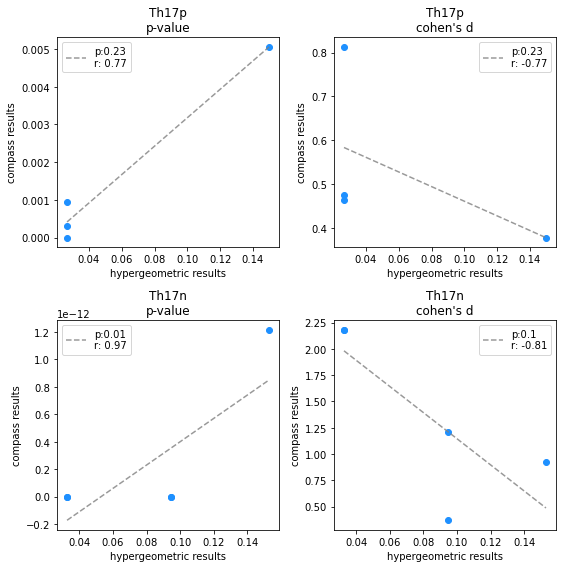

In [343]:
nrow = 2
ncol = 2
r = c=0
fig, axs = plt.subplots(nrow,ncol, figsize = (4*ncol,4*nrow))
for k,v in plotting.items():
    c=0
    for kk,vv in v.items():
        x = vv.sort_values('hypergeom')['hypergeom']
        y = vv.sort_values('hypergeom')['compass']
        axs[r,c].scatter(x = x, y = y, alpha = 1, c = 'dodgerblue')
        slope, intercept, r_line, p_line, stderr = scipy.stats.linregress(x, y)
        line = f'Regression line: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}'
        axs[r,c].plot(x, intercept + slope * x,  linestyle = '--', color = 'grey', alpha = .8, label=f"p:{np.round(plot_values[k][kk]['corr_p'], 2)}\nr: {np.round(plot_values[k][kk]['corr_r'], 2)}")
        if kk == 'p':
            k_plot = 'p-value'
        else:
            k_plot = "cohen's d"
        axs[r,c].set_title(k + '\n' + k_plot)
        axs[r,c].legend(facecolor='white')
        axs[r,c].set_xlabel('hypergeometric results')
        axs[r,c].set_ylabel('compass results')
        c+=1
    r+=1
plt.tight_layout()

In [364]:
import math

In [344]:
plot_big = pd.concat({k: plotting[k]['d'] for k in plotting.keys()}).reset_index()
plot_big['subsystem'] = [data[data['metadata_r_id'] == i]['subsystem'].iloc[0] for i in plot_big['term']]
plot_big

,level_0,term,reaction,hypergeom,compass,compass_raw,subsystem
0,Th17p,ADPRDP,ADPRDP,0.026668,0.462554,0.462554,Nucleotide interconversion
1,Th17p,ADSL2,ADSL2,0.026668,0.474111,0.474111,Purine synthesis
2,Th17p,AGPAT1,AGPAT1,0.149751,0.377313,0.377313,Triacylglycerol synthesis
3,Th17p,CYSTGL,CYSTGL,0.026668,0.812781,0.812781,Methionine and cysteine metabolism
4,Th17n,FACOAL1821,FACOAL1821,0.094810,1.211433,-1.211433,Fatty acid oxidation
5,Th17n,FACOAL1831,FACOAL1831,0.152985,0.919243,-0.919243,Fatty acid oxidation
6,Th17n,NADNe,NADNe,0.032655,2.184415,-2.184415,NAD metabolism
7,Th17n,NADPNe,NADPNe,0.032655,2.184415,-2.184415,NAD metabolism
8,Th17n,RNDR3,RNDR3,0.094810,0.369379,-0.369379,Nucleotide interconversion


In [357]:
plot_big['subsystem'].unique()

array(['Nucleotide interconversion', 'Purine synthesis',
       'Triacylglycerol synthesis', 'Methionine and cysteine metabolism',
       'Fatty acid oxidation', 'NAD metabolism'], dtype=object)

In [381]:
[(-1 * math.log(i))/4 for i in plot_big['hypergeom']]

[0.906071627428901,
 0.906071627428901,
 0.474695762757712,
 0.906071627428901,
 0.588969304081631,
 0.4693546608948433,
 0.8554405614013384,
 0.8554405614013384,
 0.588969304081631]

[3.624286509715604,
 3.624286509715604,
 1.898783051030848,
 3.624286509715604,
 2.355877216326524,
 1.8774186435793732,
 3.4217622456053536,
 3.4217622456053536,
 2.355877216326524]

(-2.4, 2.4)

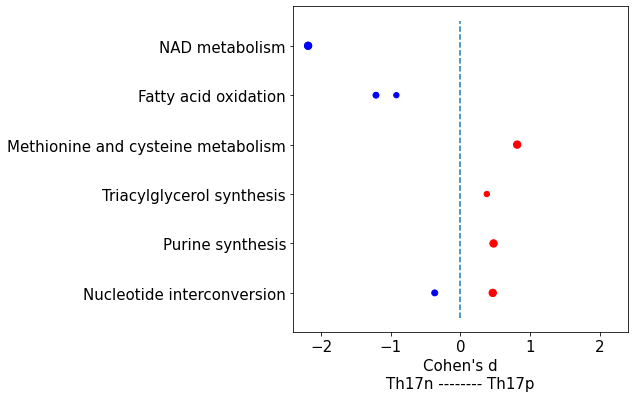

In [401]:
plt.rcParams.update({'font.size': 15})
# only significant
fig, axs = plt.subplots(figsize = (6,6))
#Sorts the reactions for plotting
#d = data[data['adjusted_pval'] < 0.05].groupby('subsystem')['cohens_d'].median().abs()
axs.scatter(plot_big['compass_raw'], plot_big['subsystem'], alpha=0)
color = plot_big['compass_raw'].map(lambda x: 'r' if x >= 0 else 'b')
axs.scatter(plot_big['compass_raw'], plot_big['subsystem'], c=color, s = [(-15 * math.log(i)) for i in plot_big['hypergeom']])
#axs.scatter(plot_big['compass_raw'], plot_big['subsystem'], c=color)
axs.set_xlabel("Cohen's d\nTh17n -------- Th17p")
axs.vlines(x=0, ymin=-.5, ymax=5.5, linestyles='--')
axs.set_xlim(-2.4,2.4)

In [308]:
reaction_metadata[reaction_metadata.index.str.contains('FACOAL1831')]

,reaction_name,formula,associated_genes,subsystem,EC_number,confidence
reaction_no_direction,,,,,,
FACOAL1831,fatty-acid--CoA ligase,1.00 * ATP [c] + 1.00 * Coenzyme A [c] + 1.00 ...,ACSBG2; ACSL1; ACSL3; ACSL4; ACSL5; ACSL6,Fatty acid oxidation,6.2.1.3,4.0


In [307]:
reaction_metadata[reaction_metadata.index.str.contains('RNDR3')]

,reaction_name,formula,associated_genes,subsystem,EC_number,confidence
reaction_no_direction,,,,,,
RNDR3,ribonucleoside-diphosphate reductase (CDP),1.00 * CDP [c] + 1.00 * Reduced thioredoxin [c...,RRM1; RRM2; RRM2B,Nucleotide interconversion,1.7.14.1,4.0


In [ ]:
print(f"pathogenic enriched genes -- only significant terms (for compass) and terms with p < 1 (for hypergeometric)")
print(f"PvN p: corr: {get_correlation(sig_pvn, pvn_rxn, how = 'p', col2 = 'metadata_r_id')} p: {get_correlation_p(sig_pvn, pvn_rxn, how = 'p', col2 = 'metadata_r_id')}")
print(f"PvN d: corr: {get_correlation(sig_pvn, pvn_rxn, how = 'd', col2 = 'metadata_r_id')} p: {get_correlation_p(sig_pvn, pvn_rxn, how = 'd', col2 = 'metadata_r_id')}")

print(f"\nnon pathogenic enriched genes -- only significant")
print(f"NvP p: corr: {get_correlation(sig_nvp, nvp_rxn, how = 'p', col2 = 'metadata_r_id')} p: {get_correlation_p(sig_nvp, nvp_rxn, how = 'p', col2 = 'metadata_r_id')}")
print(f"NvP d: corr: {get_correlation(sig_nvp, nvp_rxn, how = 'd', col2 = 'metadata_r_id')} p: {get_correlation_p(sig_nvp, nvp_rxn, how = 'd', col2 = 'metadata_r_id')}")

In [237]:
# first pass: replicate subsystem functions

In [249]:
print('pathogenic enriched terms - reactions')
print('---all terms overlap---')
print(f"compass length: {len(data[data['cohens_d'] > 0]['metadata_r_id'].unique())} hypergeom_length: {len(pvn_rxn_all)}")
print(f"n overlap: {len(set(data[data['cohens_d'] > 0]['metadata_r_id']) & set(pvn_rxn_all['term']))}")
pvn_rxn_overlap = get_overlap(data[data['cohens_d'] > 0], pvn_rxn_all, col2 = 'metadata_r_id')
print(f"compass overlap: {pvn_rxn_overlap[0]} hypergeom_length: {pvn_rxn_overlap[1]}")

pathogenic enriched terms - reactions
---all terms overlap---
compass length: 1026 hypergeom_length: 791
n overlap: 387
compass overlap: 0.37719298245614036 hypergeom_length: 0.4892541087231353


In [250]:
print('pathogenic enriched terms - reactions')
print('---all terms overlap---')
print(f"compass length: {len(data[data['cohens_d'] > 0]['metadata_r_id'].unique())} hypergeom_length: {len(pvn_rxn_all)}")
print(f"n overlap: {len(set(data[data['cohens_d'] > 0]['metadata_r_id']) & set(pvn_rxn_all['term']))}")
pvn_rxn_overlap = get_overlap(data[data['cohens_d'] > 0], pvn_rxn_all, col2 = 'metadata_r_id')
print(f"compass overlap: {pvn_rxn_overlap[0]} hypergeom overlap: {pvn_rxn_overlap[1]}")

print('\n---significant terms overlap---')
print(f"compass length: {len(sig_pvn[sig_pvn['cohens_d'] > 0]['metadata_r_id'].unique())} hypergeom_length: {len(pvn_rxn)}")
print(f"n overlap: {len(set(sig_pvn[sig_pvn['cohens_d'] > 0]['metadata_r_id']) & set(pvn_rxn['term']))}")
pvn_rxn_overlap = get_overlap(sig_pvn[sig_pvn['cohens_d'] > 0], pvn_rxn, col2 = 'metadata_r_id')
print(f"compass overlap: {pvn_rxn_overlap[0]} hypergeom overlap: {pvn_rxn_overlap[1]}")

# print('\n---correlation---')
# print(f"correlation between compass' cohen's d and hypergeom's q values")
# print(f"negative correlation is most similar")
# print(f'for all values:')
# print(f"pearson: {get_correlation(data[data['cohens_d'] > 0], pvn_rxn_all[pvn_rxn_all['q'].notna()], col2 = 'metadata_r_id')}")
# print(f"spearman: {get_correlation(data[data['cohens_d'] > 0], pvn_rxn_all[pvn_rxn_all['q'].notna()], col2 = 'metadata_r_id', how = 'spearman')}")
# print(f'\nfor significant values:')
# print(f"pearson: {get_correlation(sig_pvn, pvn_rxn, col2 = 'metadata_r_id')}")
# print(f"spearman: {get_correlation(sig_pvn, pvn_rxn, col2 = 'metadata_r_id', how = 'spearman')}")

# print('\n---hypergeometric test for overlap---')
# print(f"hypergeometric test: {get_hypergeom_overlap(sig_data[sig_data['cohens_d'] > 0], pvn_rxn, all_terms = list(set(data['metadata_r_id'])), col2 = 'metadata_r_id')}")

pathogenic enriched terms - reactions
---all terms overlap---
compass length: 1026 hypergeom_length: 791
n overlap: 387
compass overlap: 0.37719298245614036 hypergeom overlap: 0.4892541087231353

---significant terms overlap---
compass length: 417 hypergeom_length: 25
n overlap: 4
compass overlap: 0.009592326139088728 hypergeom overlap: 0.16


In [252]:
print('pathogenic enriched terms - reactions')
print('---all terms overlap---')
print(f"compass length: {len(data[data['cohens_d'] < 0]['metadata_r_id'].unique())} hypergeom_length: {len(nvp_rxn_all)}")
print(f"n overlap: {len(set(data[data['cohens_d'] < 0]['metadata_r_id']) & set(nvp_rxn_all['term']))}")
nvp_rxn_overlap = get_overlap(data[data['cohens_d'] < 0], nvp_rxn_all, col2 = 'metadata_r_id')
print(f"compass overlap: {nvp_rxn_overlap[0]} hypergeom overlap: {nvp_rxn_overlap[1]}")
print('\nnonpathogenic enriched terms - reactions')
print('---significant terms overlap---')
print(f"compass length: {len(sig_nvp[sig_nvp['cohens_d'] < 0]['metadata_r_id'].unique())} hypergeom_length: {len(nvp_rxn)}")
print(f"n overlap: {len(set(sig_nvp[sig_nvp['cohens_d'] < 0]['metadata_r_id']) & set(nvp_rxn['term']))}")
nvp_rxn_overlap = get_overlap(sig_nvp[sig_nvp['cohens_d'] < 0], nvp_rxn, col2 = 'metadata_r_id')
print(f"compass overlap: {nvp_rxn_overlap[0]} hypergeom overlap: {nvp_rxn_overlap[1]}")

# print('\n---correlation---')
# print(f"correlation between compass' cohen's d and hypergeom's q values")
# print(f"negative correlation is most similar")
# print(f'for all values:')
# print(f"pearson: {get_correlation(data[data['cohens_d'] < 0], nvp_rxn_all[nvp_rxn_all['q'].notna()], col2 = 'metadata_r_id')}")
# print(f"spearman: {get_correlation(data[data['cohens_d'] < 0], nvp_rxn_all[nvp_rxn_all['q'].notna()], col2 = 'metadata_r_id', how = 'spearman')}")
# print(f'\nfor significant values:')
# print(f"pearson: {get_correlation(sig_nvp, nvp_rxn, col2 = 'metadata_r_id')}")
# print(f"spearman: {get_correlation(sig_nvp, nvp_rxn, col2 = 'metadata_r_id', how = 'spearman')}")

# print('\n---hypergeometric test for overlap---')
# print(f"hypergeometric test: {get_hypergeom_overlap(sig_data[sig_data['cohens_d'] < 0], nvp_rxn, all_terms = list(set(data['metadata_r_id'])), col2 = 'metadata_r_id')}")

pathogenic enriched terms - reactions
---all terms overlap---
compass length: 382 hypergeom_length: 791
n overlap: 167
compass overlap: 0.43717277486910994 hypergeom overlap: 0.2111251580278129

nonpathogenic enriched terms - reactions
---significant terms overlap---
compass length: 96 hypergeom_length: 45
n overlap: 5
compass overlap: 0.052083333333333336 hypergeom overlap: 0.1111111111111111


In [77]:
pvn_rxn

,term,p,padj,q
0,5HTRPDOX,0.037331,NaN,0.0
1,ACGAM6PSi,0.037331,NaN,0.0
2,ACP1_FMN_,0.141192,NaN,0.0
3,ADK1m,0.073273,NaN,0.0
4,ADPGLC,0.037331,NaN,0.0
5,ADPMAN,0.037331,NaN,0.0
6,ADPRDP,0.037331,NaN,0.0
7,ADSL1,0.037331,NaN,0.0
8,ADSL2,0.037331,NaN,0.0
9,ATPasel,0.476584,NaN,0.0


In [107]:
colors = data[['metadata_r_id', 'cohens_d']].copy()
colors['c'] = 'blue'
colors.loc[colors['cohens_d'] >= 0, 'c'] = 'red'
colors['pvn'] = [i in list(pvn_rxn['term']) for i in colors['metadata_r_id']]
colors['nvp'] = [i in list(nvp_rxn['term']) for i in colors['metadata_r_id']]
colors['c2'] = colors['c']
colors.loc[(colors['pvn']) & (colors['nvp']), 'c2'] = 'purple'
colors.loc[(colors['pvn']) & (~colors['nvp']), 'c2'] = 'darkred'
colors.loc[(~colors['pvn']) & (colors['nvp']), 'c2'] = 'darkblue'
colors

,metadata_r_id,cohens_d,c,pvn,nvp,c2
2HBO_pos,2HBO,0.405221,red,False,False,red
34DHOXPEGOX_pos,34DHOXPEGOX,0.762535,red,False,False,red
34DHPLACOX_NADP__neg,34DHPLACOX_NADP_,0.365011,red,False,False,red
34DHPLACOX_pos,34DHPLACOX,0.365011,red,False,False,red
34DHXMANDACOX_NADP__neg,34DHXMANDACOX_NADP_,0.365011,red,False,False,red
...,...,...,...,...,...,...
r1380_pos,r1380,0.322824,red,False,False,red
r1381_neg,r1381,0.315486,red,False,False,red
r1384_neg,r1384,0.357815,red,False,False,red
r1384_pos,r1384,0.416011,red,False,False,red


2HBO_pos                   red
34DHOXPEGOX_pos            red
34DHPLACOX_NADP__neg       red
34DHPLACOX_pos             red
34DHXMANDACOX_NADP__neg    red
                          ... 
r1380_pos                  red
r1381_neg                  red
r1384_neg                  red
r1384_pos                  red
r1488_pos                  red
Name: c2, Length: 580, dtype: object

In [115]:
colors.value_counts(['c2', 'pvn', 'nvp'])

c2             pvn    nvp  
lavenderblush  False  False    460
paleturquoise  False  False    103
darkblue       False  True       9
red            True   False      6
darkviolet     True   True       2
dtype: int64

In [209]:
set(pvn_rxn['term']) & set(data[data['cohens_d'] > 0]['metadata_r_id'])

{'ADPRDP', 'ADSL2', 'AGPAT1', 'CYSTGL'}

In [210]:
set(nvp_rxn['term']) & set(data[data['cohens_d'] < 0]['metadata_r_id'])

{'FACOAL1821', 'FACOAL1831', 'NADNe', 'NADPNe', 'RNDR3'}

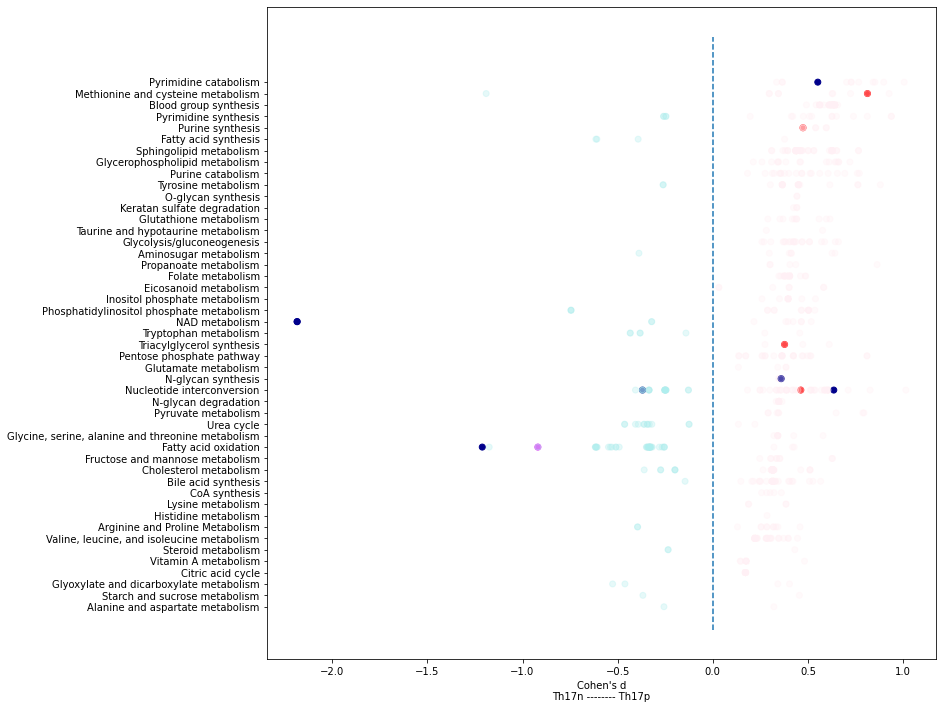

In [253]:
# only significant
data = W[~W['subsystem'].isin(["Miscellaneous", "Unassigned"])]
data = data[~data['subsystem'].map(lambda x: "Transport" in x or "Exchange" in x or x == "Other")]
items, counts = np.unique(data['subsystem'], return_counts=True)
items = [items[i] for i in range(len(items)) if counts[i] > 5] #filter(n() > 5) %>%
data = data[data['subsystem'].isin(items)]
data = data[data['adjusted_pval'] < 0.05]
plt.figure(figsize=(12,12))
axs = plt.gca()
#Sorts the reactions for plotting
d = data[data['adjusted_pval'] < 0.05].groupby('subsystem')['cohens_d'].median().abs()
axs.scatter(d[d.argsort], d[d.argsort].index, alpha=0)
#color = data['cohens_d'].map(lambda x: 'r' if x >= 0 else 'b')

colors = data[['metadata_r_id', 'cohens_d']].copy()
colors['c'] = 'paleturquoise'
colors.loc[colors['cohens_d'] >= 0, 'c'] = 'lavenderblush'
colors['pvn'] = [i in list(pvn_rxn['term']) for i in colors['metadata_r_id']]
colors['nvp'] = [i in list(nvp_rxn['term']) for i in colors['metadata_r_id']]
colors['c2'] = colors['c']
colors.loc[(colors['pvn']) & (colors['nvp']), 'c2'] = 'fuchsia'
colors.loc[(colors['pvn']) & (~colors['nvp']), 'c2'] = 'red'
colors.loc[(~colors['pvn']) & (colors['nvp']), 'c2'] = 'darkblue'
color = colors['c2']

#alpha = data['adjusted_pval'].map(lambda x: 1.0 if x < 0.1 else 0.25)
alpha = colors['c2'].map(lambda x: .3 if ((x == 'lavenderblush') or (x == 'paleturquoise')) else 1)
axs.scatter(data['cohens_d'], data['subsystem'], c=color, alpha=alpha)
axs.set_xlabel("Cohen's d\nTh17n -------- Th17p")
axs.vlines(x=0, ymin=-2, ymax=50, linestyles='--')

In [204]:
W[W['subsystem'].str.contains("Nucleotide")]

,wilcox_stat,wilcox_pval,cohens_d,adjusted_pval,metadata_r_id,reaction_name,formula,associated_genes,subsystem,EC_number,confidence
ADK1m_neg,11217.0,3.115325e-01,0.068375,0.441922,ADK1m,"adenylate kinase, mitochondrial",1.00 * ATP [m] + 1.00 * AMP [m] --> 2.00 * ADP...,AK2; AK4,Nucleotide interconversion,2.7.4.3,4.0
ADK1m_pos,11217.0,3.115325e-01,0.068375,0.441922,ADK1m,"adenylate kinase, mitochondrial",1.00 * ATP [m] + 1.00 * AMP [m] --> 2.00 * ADP...,AK2; AK4,Nucleotide interconversion,2.7.4.3,4.0
ADKd_neg,13310.0,7.955936e-05,0.387031,0.000497,ADKd,adenylate kinase (d form),1.00 * dAMP(2-) [c] + 1.00 * dATP [c] --> 2.00...,AK5,Nucleotide interconversion,2.7.4.3,4.0
ADKd_pos,13310.0,7.955936e-05,0.387031,0.000497,ADKd,adenylate kinase (d form),1.00 * dAMP(2-) [c] + 1.00 * dATP [c] --> 2.00...,AK5,Nucleotide interconversion,2.7.4.3,4.0
ADNCYC_pos,11287.0,2.669435e-01,0.124143,0.391357,ADNCYC,adenylate cyclase,1.00 * ATP [c] --> 1.00 * Diphosphate [c] + 1....,ADCY1; ADCY10; ADCY2; ADCY3; ADCY4; ADCY5; ADC...,Nucleotide interconversion,4.6.1.1,4.0
...,...,...,...,...,...,...,...,...,...,...,...
r0531_pos,13745.0,5.227268e-06,0.448092,0.000046,r0531,dUTP:cytidine 5-phosphotransferase Pyrimidine ...,1.00 * Cytidine [c] + 1.00 * dUTP [c] --> 1.00...,UCK1; UCK2,Nucleotide interconversion,2.7.1.48,0.0
r1156_neg,11616.0,1.161174e-01,0.162789,0.198502,r1156,dUTP:uridine 5-phosphotransferase Pyrimidine m...,1.00 * Uridine [c] + 1.00 * dUTP [c] --> 1.00 ...,UCK1; UCK2; UCKL1,Nucleotide interconversion,2.7.1.48,0.0
r1156_pos,12735.0,1.690870e-03,0.333936,0.006324,r1156,dUTP:uridine 5-phosphotransferase Pyrimidine m...,1.00 * Uridine [c] + 1.00 * dUTP [c] --> 1.00 ...,UCK1; UCK2; UCKL1,Nucleotide interconversion,2.7.1.48,0.0
r1384_neg,14180.5,2.344806e-07,0.357815,0.000004,r1384,Guanosine aminohydrolase EC:3.5.4.15,1.00 * Water [c] + 1.00 * proton [c] + 1.00 * ...,NaN,Nucleotide interconversion,3.5.4.15,0.0


In [205]:
t = list(set(colors['metadata_r_id']) & set(W[W['subsystem'].str.contains("Nucleotide")]['metadata_r_id']))
colors['ind'] = colors.index
colors.index = colors['metadata_r_id']
tt = colors.loc[t].copy()
tt[(tt['pvn']) | (tt['nvp'])]

,metadata_r_id,cohens_d,c,pvn,nvp,c2,ind
metadata_r_id,,,,,,,
NTD7e,NTD7e,0.635847,lavenderblush,False,True,darkblue,NTD7e
RNDR3,RNDR3,-0.369379,paleturquoise,False,True,darkblue,RNDR3
ADPRDP,ADPRDP,0.462554,lavenderblush,True,False,red,ADPRDP


In [180]:
colors[colors['Subsystem'].str.contains('Fatty')]

KeyError: 'Subsystem'

In [175]:
pvn_rxn['term']

23      ACGAM6PSi
45         ADPGLC
46         ADPMAN
47         ADPRDP
49          ADSL1
50          ADSL2
52         AGPAT1
116        CYSTGL
201    FACOAL1831
267     FAS100COA
268     FAS120COA
269     FAS140COA
270     FAS160COA
271     FAS180COA
420          GTHO
421         GTHOm
427        HACD1m
428        HACD9m
455          KAS8
475        LPCOXp
515          MTAP
548    NADH2_u10m
713       SARCOXp
716     SELCYSTGL
735         SPRMS
Name: term, dtype: object

In [ ]:
# plot only ones from our results

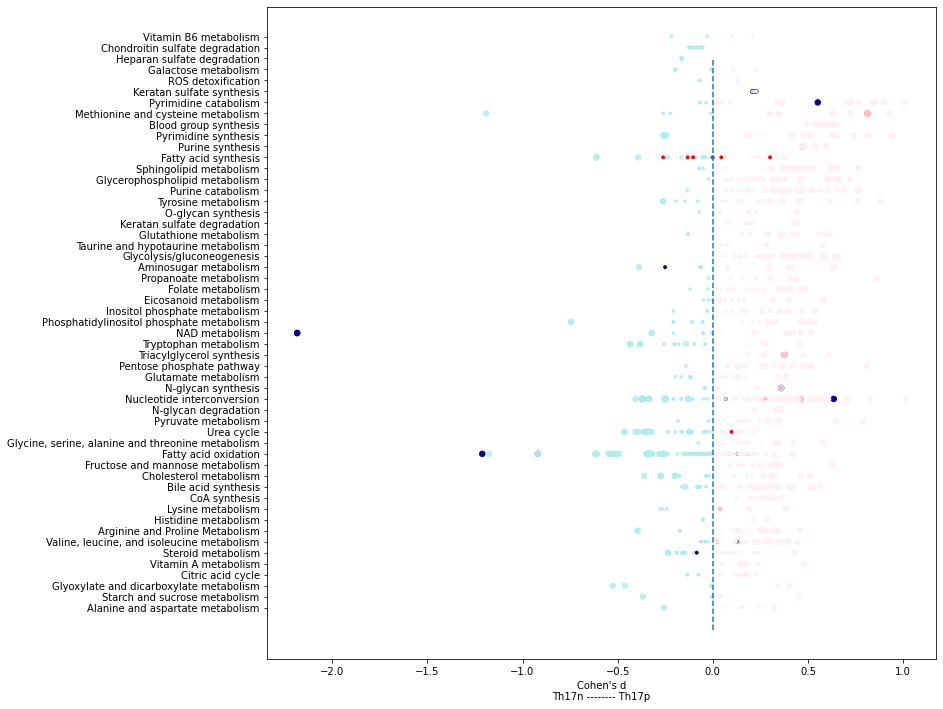

In [120]:
# all reactions
data = W[~W['subsystem'].isin(["Miscellaneous", "Unassigned"])]
data = data[~data['subsystem'].map(lambda x: "Transport" in x or "Exchange" in x or x == "Other")]
items, counts = np.unique(data['subsystem'], return_counts=True)
items = [items[i] for i in range(len(items)) if counts[i] > 5] #filter(n() > 5) %>%
data = data[data['subsystem'].isin(items)]
#data = data[data['adjusted_pval'] < 0.05]
plt.figure(figsize=(12,12))
axs = plt.gca()
#Sorts the reactions for plotting
d = data[data['adjusted_pval'] < 0.05].groupby('subsystem')['cohens_d'].median().abs()
axs.scatter(d[d.argsort], d[d.argsort].index, alpha=0)
#color = data['cohens_d'].map(lambda x: 'r' if x >= 0 else 'b')

colors = data[['metadata_r_id', 'cohens_d']].copy()
colors['c'] = 'paleturquoise'
colors.loc[colors['cohens_d'] >= 0, 'c'] = 'lavenderblush'
colors['pvn'] = [i in list(pvn_rxn['term']) for i in colors['metadata_r_id']]
colors['nvp'] = [i in list(nvp_rxn['term']) for i in colors['metadata_r_id']]
colors['c2'] = colors['c']
colors.loc[(colors['pvn']) & (colors['nvp']), 'c2'] = 'darkviolet'
colors.loc[(colors['pvn']) & (~colors['nvp']), 'c2'] = 'red'
colors.loc[(~colors['pvn']) & (colors['nvp']), 'c2'] = 'darkblue'
color = colors['c2']

#alpha = data['adjusted_pval'].map(lambda x: 1.0 if x < 0.1 else 0.25)
alpha = colors['c2'].map(lambda x: .8 if ((x == 'lavenderblush') or (x == 'paleturquoise')) else 1)
size = data['adjusted_pval'].map(lambda x: 30 if x < 0.05 else 8)
axs.scatter(data['cohens_d'], data['subsystem'], c=color, alpha=alpha, s = size)
axs.set_xlabel("Cohen's d\nTh17n -------- Th17p")
axs.vlines(x=0, ymin=-2, ymax=50, linestyles='--')

# plot below

In [27]:
import matplotlib.pyplot as plt
import matplotlib
def plot_differential_scores(data, title, c):
    plt.figure(figsize=(10,10))
    axs = plt.gca()
    axs.scatter(data['cohens_d'], -np.log10(data['adjusted_pval']), c=c)
    axs.set_xlabel("Cohen's d", fontsize=16)
    axs.set_ylabel("-log10 (Wilcoxon-adjusted p)", fontsize=16)
    #Everything after this should be tweaked depending on your application
    axs.set_xlim(-6.2, 6.2)
    axs.axvline(0, dashes=(3,3), c='black')
    axs.axhline(1, dashes=(3,3), c='black')
    axs.set_title(title, fontdict={'fontsize':20})
    axs.annotate('', xy=(0.5, -0.08), xycoords='axes fraction', xytext=(0, -0.08),
            arrowprops=dict(arrowstyle="<-", color='#348C73', linewidth=4))
    axs.annotate('Th17p_V', xy=(0.75, -0.12), xycoords='axes fraction', fontsize=16)
    axs.annotate('', xy=(0.5, -0.08), xycoords='axes fraction', xytext=(1, -0.08),
            arrowprops=dict(arrowstyle="<-", color='#E92E87', linewidth=4))
    axs.annotate('Th17n_V', xy=(0.25, -0.12), xycoords='axes fraction', fontsize=16)
    for r in data.index:
        if r in labeled_reactions:
            x = data.loc[r, 'cohens_d']
            y = -np.log10(data.loc[r, 'adjusted_pval'])
            offset = (20, 0)
            if x < 0:
                offset = (-100, -40)
            axs.annotate(labeled_reactions[r], (x,y), xytext = offset,
                         textcoords='offset pixels', arrowprops={'arrowstyle':"-"})

In [28]:
filtered_data = pd.concat([W[W['subsystem'] == "Nucleotide interconversion"],
                           W[W['subsystem'] == "Fatty acid oxidation"],
                           W[W['subsystem'] == "Keratan sulfate synthesis"],
                           W[W['subsystem'] == "Keratan sulfate degradation"],
                          ])

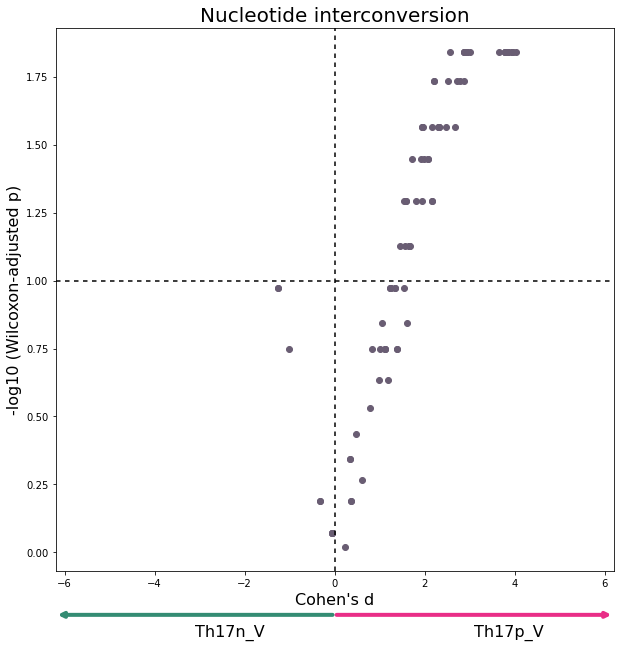

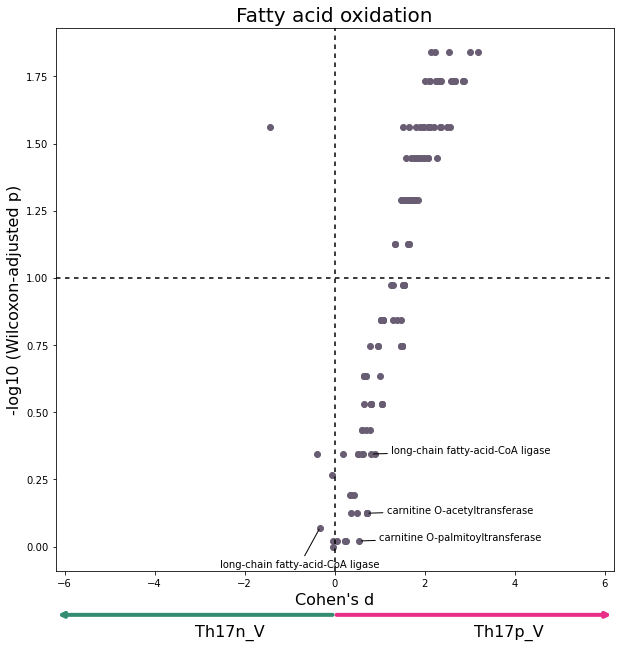

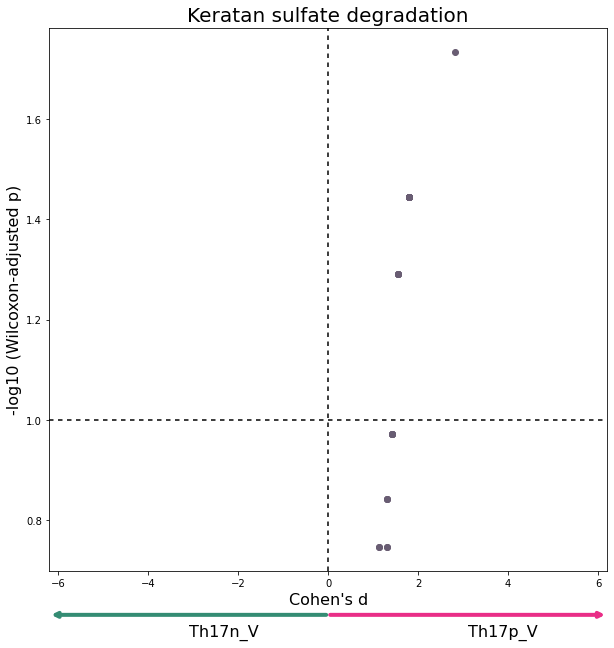

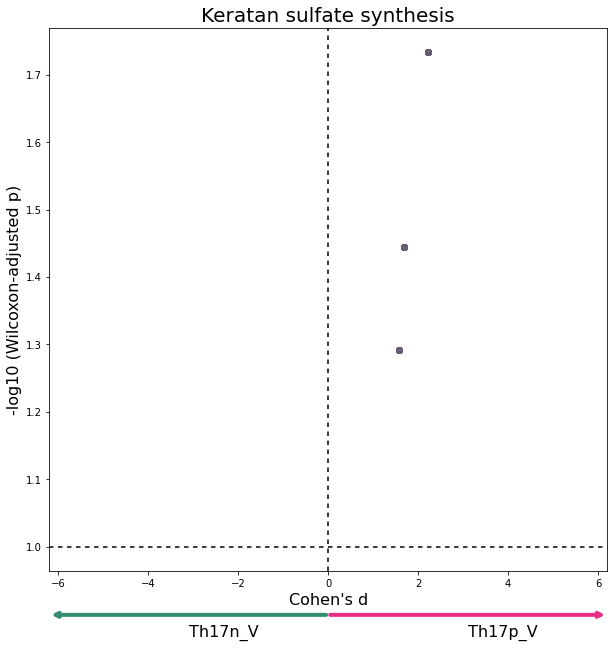

In [29]:
for item in filtered_data['subsystem'].value_counts().keys():
    data = W[W['subsystem'] == item]
    plot_differential_scores(data, title=item, c="#695D73")

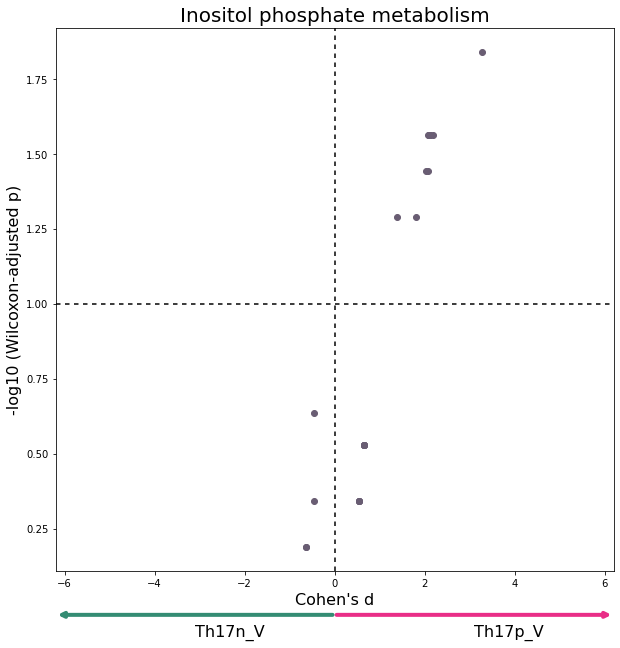

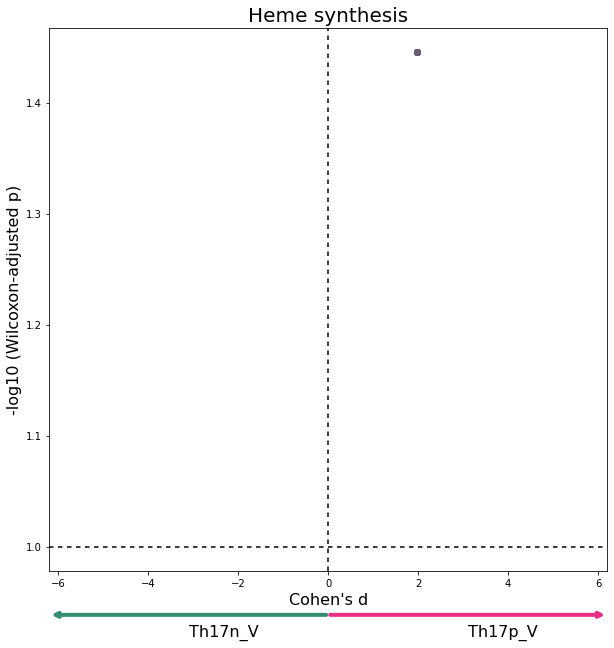

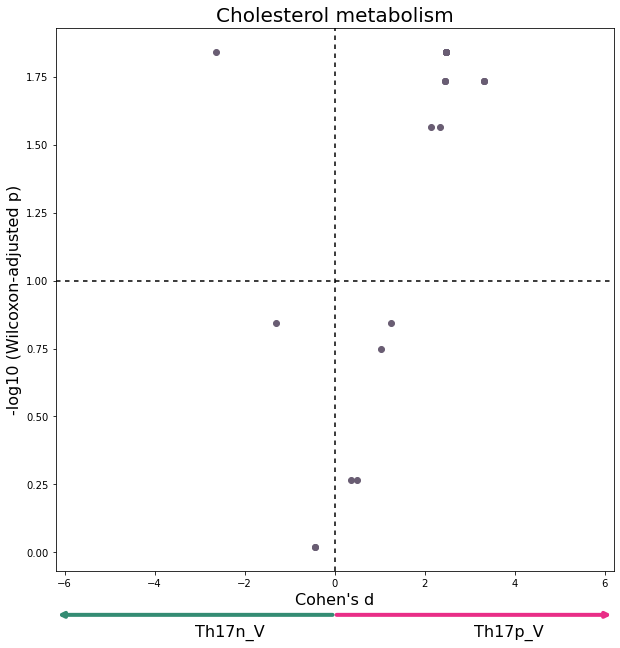

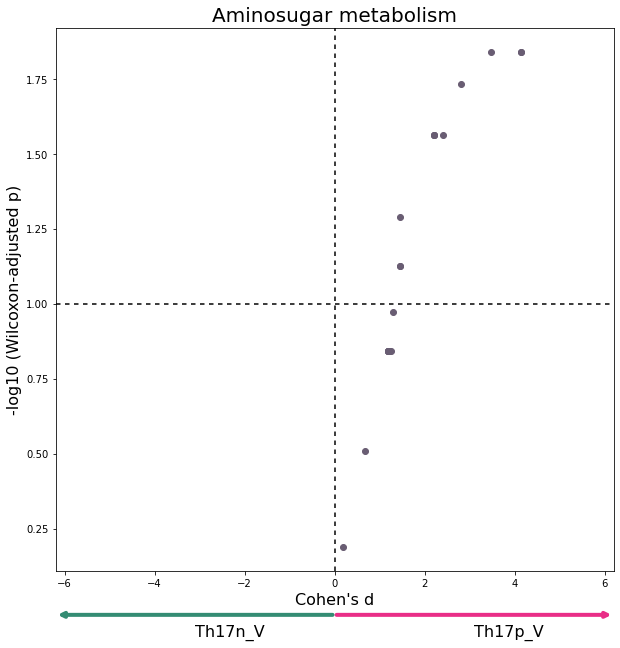

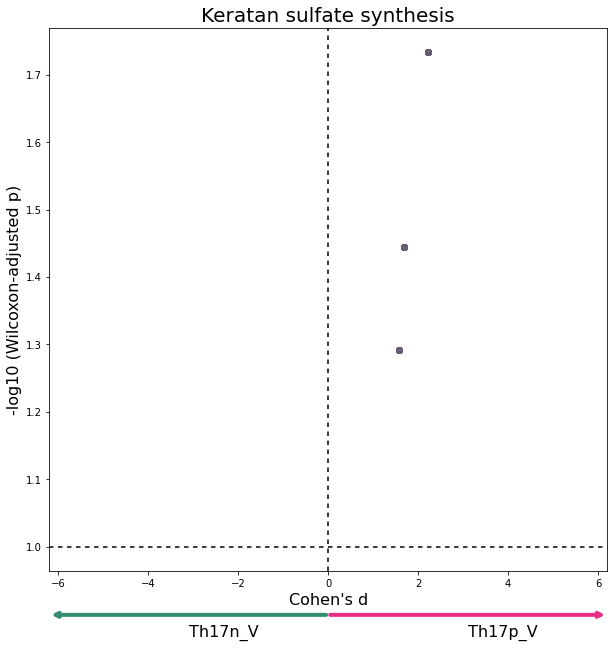

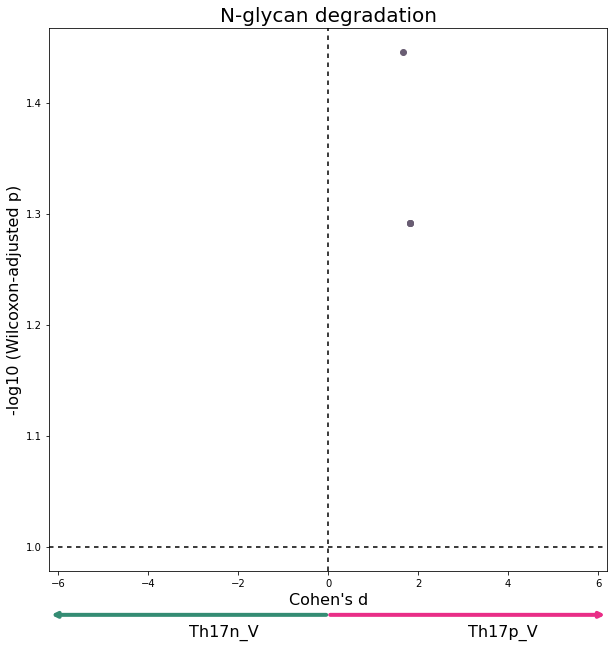

In [30]:
keys = ["Inositol phosphate metabolism", "Heme synthesis", "Cholesterol metabolism", 
        "Aminosugar metabolism", "Keratan sulfate synthesis", "N-glycan degradation"]
for item in keys:
    data = W[W['subsystem'] == item]
    plot_differential_scores(data, title=item, c="#695D73")